# Understanding provider payment data released by CMS in 2014

The provider payment data released by CMS (http://download.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Medicare_Physician_and_Other_Supplier_NPI_Aggregate_CY2014.zip.) This page (https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Physician-and-Other-Supplier2014.html) gives some background of the data. This technical document (https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Medicare-Physician-and-Other-Supplier-PUF-Methodology.pdf) provides some critical information such as the definition of each variable. 

The data set contains two types of providers: individual and organization. We only look at individuals for all the questions in this exercise (nppes_entity_code equals 'I'). 

The data has been used to answer the first three questions about providers and their provider type that are paid the most. 

The data was then used to predict if a provider is "pcp" given the existing features in the model. 
“pcp” has a value of 1 if the provider’s specialty (provider_type) is either “Internal Medicine” or “Family Practice”; “pcp” has a value of 0 if the provider’s specialty (provider_type) is neither “Internal Medicine” nor “Family Practice”. 

# Loading and exploring the data

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling as pf 
import sklearn
import scipy
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(18,6)})
sns.set_style("white")
sns.set_style("ticks")
# read in data

In [3]:
#load dataset
dat = pd.read_table('C:/Users/ritwi/Documents/Fresenius Data Challenge/Medicare_Physician_and_Other_Supplier_NPI_Aggregate_CY2014/Medicare_Physician_and_Other_Supplier_NPI_Aggregate_CY2014.txt',low_memory=False)

In [3]:
dat

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,beneficiary_cc_depr_percent,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,Beneficiary_Average_Risk_Score
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,46.0,52.0,70.0,75.0,68.0,14.0,53.0,18.0,20.0,2.2206
1,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,...,12.0,20.0,53.0,57.0,28.0,9.0,37.0,1.0,3.0,1.0007
2,1003000142,KHALIL,RASHID,NaN,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,...,44.0,48.0,61.0,75.0,41.0,8.0,75.0,9.0,NaN,1.7777
3,1003000407,GIRARDI,DAVID,J,D.O.,M,I,456 MAGEE AVE,NaN,PATTON,...,47.0,40.0,59.0,75.0,62.0,11.0,45.0,19.0,10.0,1.7228
4,1003000423,VELOTTA,JENNIFER,A,M.D.,F,I,11100 EUCLID AVE,NaN,CLEVELAND,...,32.0,23.0,51.0,46.0,19.0,NaN,32.0,NaN,NaN,0.9101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986672,1992999569,YUEN,JENNY,F,"O.D., F.A.A.O",F,I,195 PEABODY ST,NaN,SAN FRANCISCO,...,NaN,43.0,66.0,75.0,29.0,19.0,47.0,NaN,NaN,1.0702
986673,1992999585,MAREK,NORMAN,F,D.C.,M,I,1355 FOUR MILE DR,NaN,WILLIAMSPORT,...,NaN,NaN,51.0,54.0,NaN,0.0,41.0,0.0,0.0,0.8628
986674,1992999775,"SPINE SURGERY CENTER OF EUGENE, LLC",NaN,NaN,NaN,NaN,O,1410 OAK ST,SUITE 300,EUGENE,...,30.0,23.0,53.0,61.0,23.0,NaN,70.0,NaN,NaN,0.8410
986675,1992999825,DESCHENES,GEOFFREY,R,M.D.,M,I,1100 9TH AVE,MS:M4-PFS,SEATTLE,...,22.0,25.0,45.0,53.0,22.0,7.0,38.0,3.0,5.0,1.1005


Only selecting data for individuals (nppes entity code = I)

In [21]:
#This is the data that was used throughout the exercise
selected_dat = dat[dat.nppes_entity_code == 'I'] 

In [4]:
selected_dat

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,beneficiary_cc_depr_percent,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,Beneficiary_Average_Risk_Score
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,46.0,52.0,70.0,75.0,68.0,14.0,53.0,18.0,20.0,2.2206
1,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,...,12.0,20.0,53.0,57.0,28.0,9.0,37.0,1.0,3.0,1.0007
2,1003000142,KHALIL,RASHID,NaN,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,...,44.0,48.0,61.0,75.0,41.0,8.0,75.0,9.0,NaN,1.7777
3,1003000407,GIRARDI,DAVID,J,D.O.,M,I,456 MAGEE AVE,NaN,PATTON,...,47.0,40.0,59.0,75.0,62.0,11.0,45.0,19.0,10.0,1.7228
4,1003000423,VELOTTA,JENNIFER,A,M.D.,F,I,11100 EUCLID AVE,NaN,CLEVELAND,...,32.0,23.0,51.0,46.0,19.0,NaN,32.0,NaN,NaN,0.9101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986671,1992999551,MOLAI,INDIRA,NaN,M.D.,F,I,19735 GERMANTOWN RD,STE 100,GERMANTOWN,...,27.0,27.0,40.0,67.0,26.0,NaN,32.0,NaN,NaN,0.9611
986672,1992999569,YUEN,JENNY,F,"O.D., F.A.A.O",F,I,195 PEABODY ST,NaN,SAN FRANCISCO,...,NaN,43.0,66.0,75.0,29.0,19.0,47.0,NaN,NaN,1.0702
986673,1992999585,MAREK,NORMAN,F,D.C.,M,I,1355 FOUR MILE DR,NaN,WILLIAMSPORT,...,NaN,NaN,51.0,54.0,NaN,0.0,41.0,0.0,0.0,0.8628
986675,1992999825,DESCHENES,GEOFFREY,R,M.D.,M,I,1100 9TH AVE,MS:M4-PFS,SEATTLE,...,22.0,25.0,45.0,53.0,22.0,7.0,38.0,3.0,5.0,1.1005


In [27]:
#check for missing values
selected_dat.isna().any()

npi                               False
nppes_provider_last_org_name       True
nppes_provider_first_name          True
nppes_provider_mi                  True
nppes_credentials                  True
                                  ...  
beneficiary_cc_ost_percent         True
beneficiary_cc_raoa_percent        True
beneficiary_cc_schiot_percent      True
beneficiary_cc_strk_percent        True
Beneficiary_Average_Risk_Score    False
Length: 70, dtype: bool

In [29]:
#no missing values in the amount paird by Medicare to any individual provider
selected_dat.total_medicare_payment_amt.isna().any() 

False

In [30]:
#no missing values
len(selected_dat[selected_dat.total_medicare_payment_amt.isna()])/len(selected_dat)

0.0

In [38]:
#all unique npis
len(selected_dat.npi.unique())/len(selected_dat)

1.0

In [22]:
selected_dat = selected_dat.reset_index() #because we removed some rows that were organisations

#finding the index with the maximum total medicare payment amount and finding all the associated elements
provider_maximum_amount_paid = selected_dat.loc[selected_dat['total_medicare_payment_amt'].idxmax()]

In [6]:
provider_maximum_amount_paid #associated details about Asad Qamar

index                                  31757
npi                               1033145487
nppes_provider_last_org_name           QAMAR
nppes_provider_first_name               ASAD
nppes_provider_mi                          U
                                     ...    
beneficiary_cc_ost_percent                 8
beneficiary_cc_raoa_percent               38
beneficiary_cc_schiot_percent              2
beneficiary_cc_strk_percent                9
Beneficiary_Average_Risk_Score        1.4846
Name: 29687, Length: 71, dtype: object

# Predictive modelling
To understand the data, I first created the target feature 'pcp' and added it to the data. Then, I explored the data after normalizing some features (eg., total services or payment) to the number of unique beneficiaries of each provider. This helped with navigating the differences in the popularity of some specialties over some others. Finally, I evaluated a few machine learning models after processing the data.

In [23]:
#target variable "pcp"
selected_dat['pcp'] = [1 if (x == 'Internal Medicine') or (x == 'Family Practice') else 0 for x in selected_dat['provider_type']]

In [7]:
#understanding the features
selected_dat[['npi', 'provider_type', 'pcp']]

,npi,provider_type,pcp
0,1003000126,Internal Medicine,1
1,1003000134,Pathology,0
2,1003000142,Anesthesiology,0
3,1003000407,Family Practice,1
4,1003000423,Obstetrics/Gynecology,0
...,...,...,...
925342,1992999551,Internal Medicine,1
925343,1992999569,Optometry,0
925344,1992999585,Chiropractic,0
925345,1992999825,Otolaryngology,0


In [8]:
selected_dat.head()

,index,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,...,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,Beneficiary_Average_Risk_Score,pcp
0,0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,...,52.0,70.0,75.0,68.0,14.0,53.0,18.0,20.0,2.2206,1
1,1,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,20.0,53.0,57.0,28.0,9.0,37.0,1.0,3.0,1.0007,0
2,2,1003000142,KHALIL,RASHID,NaN,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,...,48.0,61.0,75.0,41.0,8.0,75.0,9.0,NaN,1.7777,0
3,3,1003000407,GIRARDI,DAVID,J,D.O.,M,I,456 MAGEE AVE,NaN,...,40.0,59.0,75.0,62.0,11.0,45.0,19.0,10.0,1.7228,1
4,4,1003000423,VELOTTA,JENNIFER,A,M.D.,F,I,11100 EUCLID AVE,NaN,...,23.0,51.0,46.0,19.0,NaN,32.0,NaN,NaN,0.9101,0


In [40]:
#Data descriptives
pd.DataFrame.describe(selected_dat)

,index,npi,number_of_hcpcs,total_services,total_unique_benes,total_submitted_chrg_amt,total_medicare_allowed_amt,total_medicare_payment_amt,total_medicare_stnd_amt,number_of_drug_hcpcs,...,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,Beneficiary_Average_Risk_Score,pcp
count,925347.000000,9.253470e+05,925347.000000,9.253470e+05,925347.000000,9.253470e+05,9.253470e+05,9.253470e+05,9.253470e+05,822972.000000,...,794263.000000,855075.000000,875069.000000,788433.000000,586339.000000,830167.000000,491671.000000,521660.000000,925347.000000,925347.000000
mean,493438.225988,1.499758e+09,33.666992,2.223328e+03,340.172018,2.910416e+05,1.089607e+05,8.234515e+04,8.180350e+04,1.955562,...,36.779202,57.297394,67.389122,40.014729,10.028347,44.527834,9.466047,8.588914,1.511410,0.194233
std,284833.444526,2.880141e+08,35.030890,1.218120e+04,557.926870,6.463583e+05,2.467312e+05,1.904679e+05,1.885201e+05,5.739555,...,12.332883,11.822844,9.926270,15.146379,5.554156,12.928915,12.374023,7.812049,0.717678,0.395609
min,0.000000,1.003000e+09,1.000000,1.100000e+01,11.000000,4.600000e+01,3.132000e+01,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.271300,0.000000
25%,246718.500000,1.245583e+09,10.000000,1.970000e+02,67.000000,3.448112e+04,1.547872e+04,1.142428e+04,1.170297e+04,0.000000,...,28.000000,50.000000,62.000000,29.000000,7.000000,36.000000,3.000000,4.000000,1.027400,0.000000
50%,493508.000000,1.497979e+09,23.000000,5.770000e+02,177.000000,1.167210e+05,4.540303e+04,3.379777e+04,3.379437e+04,0.000000,...,35.000000,58.000000,72.000000,38.000000,10.000000,42.000000,6.000000,7.000000,1.321400,0.000000
75%,740139.500000,1.750304e+09,45.000000,1.656000e+03,395.000000,3.152545e+05,1.174375e+05,8.803187e+04,8.750498e+04,1.000000,...,44.000000,66.000000,75.000000,50.000000,13.000000,51.000000,11.000000,12.000000,1.817600,0.000000
max,986676.000000,1.993000e+09,619.000000,3.452292e+06,55886.000000,4.156214e+07,1.894713e+07,1.480165e+07,1.520900e+07,119.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,10.967400,1.000000


Total average medical services in 2014 amounted to 2200 (+/-12180). The standard deviation is fairly high meaning they are highly variable. The variability is also high in the total medicare amount paid to each provider type. This could be normalized to understand the data better. 

In [258]:
# finding columns with missing values or finding any duplicated columns in the following two pieces of code.
print(selected_dat)
print('------------------------------------')

# Create matrix of independent and dependent variable 
X = selected_dat.iloc[:,:-1].values # independent variables
y = selected_dat.iloc[:,-1].values # dependent variables
X.ndim, y.ndim

         index         npi nppes_provider_last_org_name  \
0            0  1003000126                    ENKESHAFI   
1            1  1003000134                       CIBULL   
2            2  1003000142                       KHALIL   
3            3  1003000407                      GIRARDI   
4            4  1003000423                      VELOTTA   
...        ...         ...                          ...   
925342  986671  1992999551                        MOLAI   
925343  986672  1992999569                         YUEN   
925344  986673  1992999585                        MAREK   
925345  986675  1992999825                    DESCHENES   
925346  986676  1992999874                        JOFFE   

       nppes_provider_first_name nppes_provider_mi nppes_credentials  \
0                        ARDALAN               NaN              M.D.   
1                         THOMAS                 L              M.D.   
2                         RASHID               NaN              M.D.   
3  

(2, 1)

In [262]:
# check the presence of null data.
# The snippets below will be able to compare nan values between 2 columns,
# so in principle missing data are not a problem.
# in any case, we see that there are no missing data in this dataset
[col for col in selected_dat.columns if selected_dat[col].isnull().sum() > 0]

# check if there are duplicated rows (the columns of the original dataframe)
# this is a computionally expensive operation, so it might take a while
# sum indicates how many rows are duplicated

selected_dat.duplicated().sum()

0

In [8]:
#For simplicity, I first looked at only the numerical data

# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess whether they are correlated with other features

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(selected_dat.select_dtypes(include=numerics).columns)
numerical_data = selected_dat[numerical_vars]
numerical_data.shape

(925347, 56)

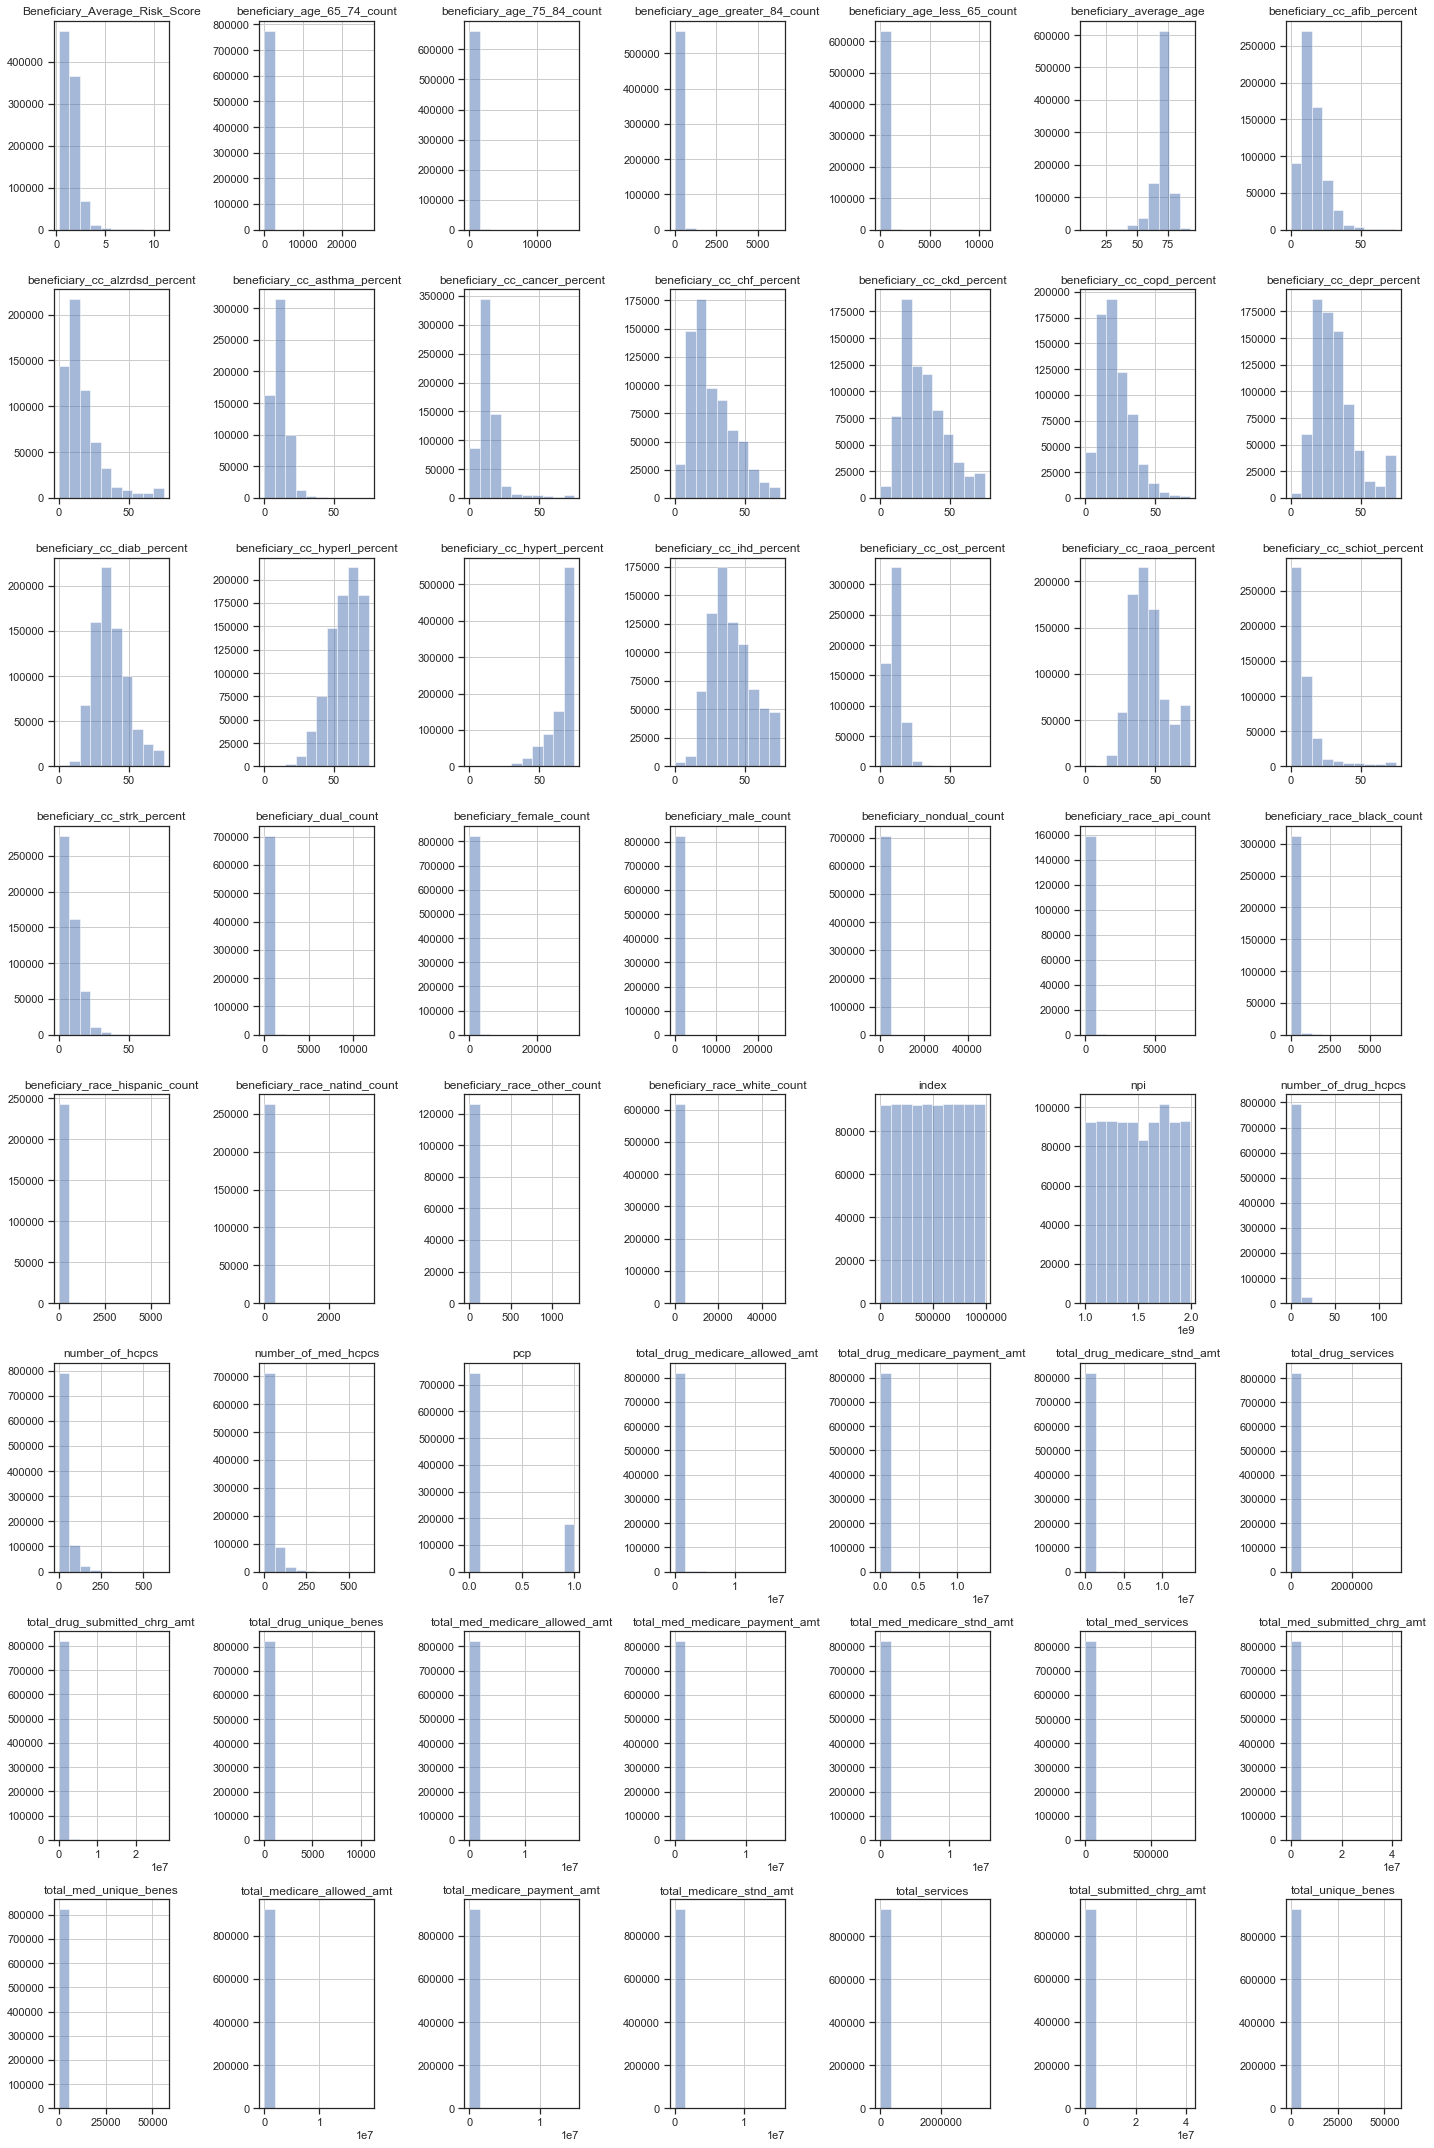

In [38]:
#looking at the distribution of all features to find any correlations 
numerical_data.hist(alpha=0.5,figsize = (20,30))
plt.tight_layout()
plt.show()

There are several features in this data. Many seem redundant. I will dive deeper into them after performing some correlation checks.

But before that, I will normalize some features in the data (medicare payment, total services, and total med services) before visualizing them to the total unique beneficiaries. This helped not skew the distribution to those that are most popular and have higher beneficiaries, thus getting a higher payment because of increased services. 
Please note that I have normalized the total med services to the total med unique beneficiaries. I neglected the total drug services because they did not represent most of the services (total services were mostly med services). I have also applied a cap on the normalized payment amount to avoid undesirable high imbalances. 

In [24]:
#Normalizing some of the numerical features

selected_dat["Normalized_total_medicare_payment"] = selected_dat.total_medicare_payment_amt/selected_dat.total_unique_benes
selected_dat["Normalized_total_services"] = selected_dat.total_services/selected_dat.total_unique_benes
selected_dat["Normalized_med_services"] = selected_dat.total_med_services/selected_dat.total_med_unique_benes

In [26]:
#putting a cap (there were two sample points between 100000 and 200000 for PCP = 0 
#that I removed to decreases some of the imbalance)

selected_dat = selected_dat[selected_dat.Normalized_total_medicare_payment < 100000] 

Text(0, 0.5, 'Frequency')

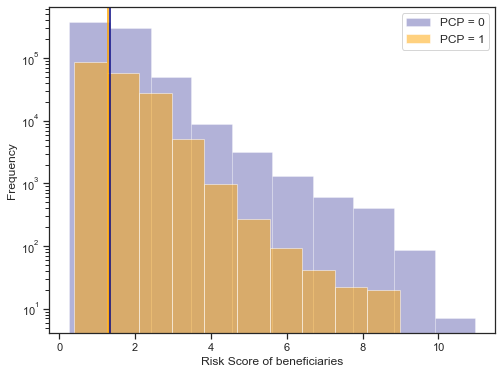

In [30]:
#visualizing the average risk score between the two classes of pcp. When pcp = 1 (Internal Medicine and Family Practice), 
#the risk score on average was lower, but the median values were generally similar. 

selected_dat[selected_dat.pcp == 0].Beneficiary_Average_Risk_Score.plot(kind='hist', logy=True, alpha=0.3, label='PCP = 0', color = "navy", figsize=(8,6))
selected_dat[selected_dat.pcp == 1].Beneficiary_Average_Risk_Score.plot(kind = "hist", logy = True, alpha = 0.5, label = 'PCP = 1', color = "orange", figsize = (8,6))
plt.axvline(selected_dat[selected_dat.pcp == 0].Beneficiary_Average_Risk_Score.median(), color='navy', label='')
plt.axvline(selected_dat[selected_dat.pcp == 1].Beneficiary_Average_Risk_Score.median(), color = 'orange', label ='')
plt.legend(loc=1, fontsize='medium')
plt.xlabel('Risk Score of beneficiaries')
plt.ylabel('Frequency')

The distribution of the risk score was generally similar between both clases with a higher frequency in pcp = 0. This implies an imbalance in data which I have been mindful of in the model development.

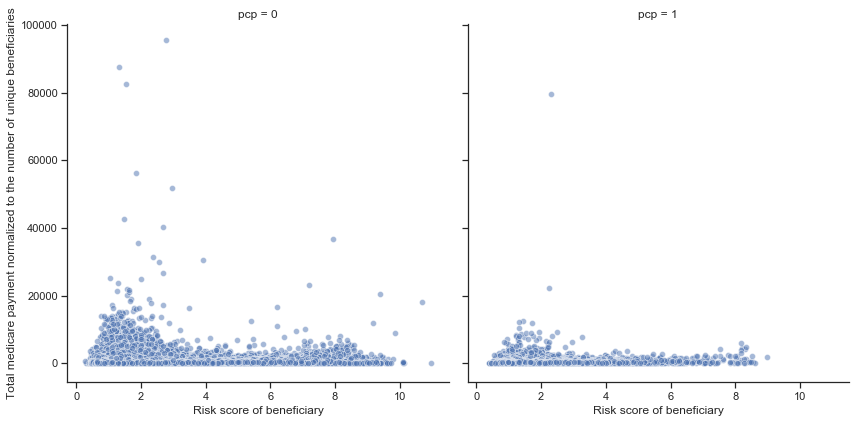

In [27]:
g = sns.FacetGrid(selected_dat, col="pcp", col_wrap=2, height=6, sharex=True, sharey=True)
g.map(sns.scatterplot, "Beneficiary_Average_Risk_Score", "Normalized_total_medicare_payment", alpha=.5)
g.add_legend();
axes = g.axes.flatten();
axes[0].set_xlabel("Risk score of beneficiary");
axes[0].set_ylabel("Total medicare payment normalized to the number of unique beneficiaries");
axes[1].set_xlabel("Risk score of beneficiary");
axes[1].set_ylabel("Total medicare payment normalized to the number of unique beneficiaries");

A surprising finding was this almost bimodal payment to beneficiaries in two average risk score brackets between 1-2 and 8-9. Both classes of pcp have that, although it is more pronounced for pcp = 0. 
Average risk score is at 1.5, meaning higher payments in the lower risk score age group. But the spike in the higher risk score could be due to increased need for medical care because of higher risk to ailments. 

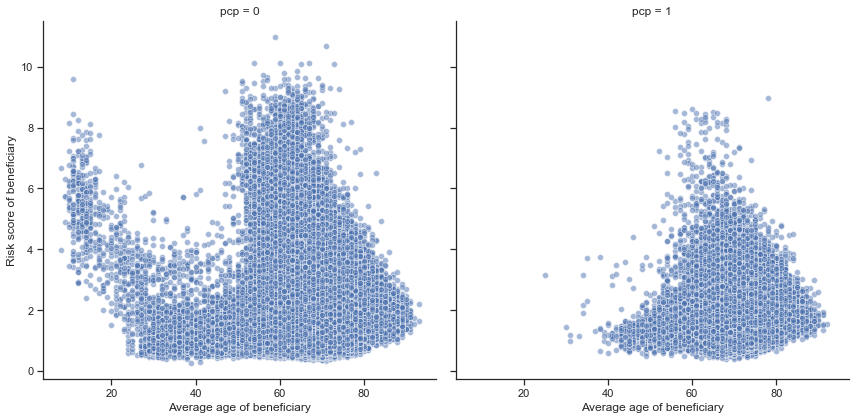

In [33]:
g = sns.FacetGrid(selected_dat, col="pcp", col_wrap=2, height=6, sharex=True, sharey=True)
g.map(sns.scatterplot, "beneficiary_average_age", "Beneficiary_Average_Risk_Score", alpha=.5)
g.add_legend();
axes = g.axes.flatten();
axes[0].set_xlabel("Average age of beneficiary");
axes[0].set_ylabel("Risk score of beneficiary");
axes[1].set_xlabel("Average age of beneficiary");
axes[1].set_ylabel("Risk score of beneficiary");

To further explore the bimodal relationship of the payments, I plotted the risk scores with the age of the beneficiaries and found that pcp = 1 (Internal medicine and Family practice) have most beneficiaries in ages 40-80 with a large span of risk score. But, other specialties have additional beneficiaries at a younger age <30 with severe risks. 

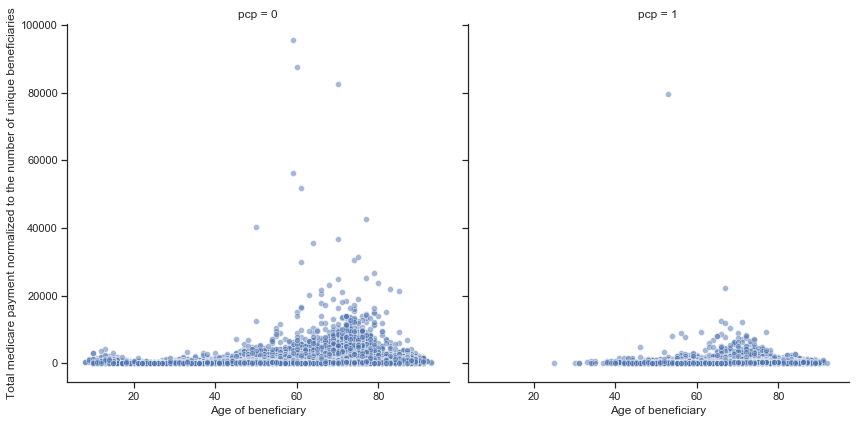

In [14]:
g = sns.FacetGrid(selected_dat, col="pcp", col_wrap=2, height=6, sharex=True, sharey=True)
g.map(sns.scatterplot, "beneficiary_average_age", "Normalized_total_medicare_payment", alpha=.5)
#g.map(plt.axvline, y = , ls='--', c='red', alpha=.25)
g.add_legend();
axes = g.axes.flatten();
axes[0].set_xlabel("Age of beneficiary");
axes[0].set_ylabel("Total medicare payment normalized to the number of unique beneficiaries");
axes[1].set_xlabel("Age of beneficiary");
axes[1].set_ylabel("Total medicare payment normalized to the number of unique beneficiaries");

Text(0, 0.5, 'Frequency')

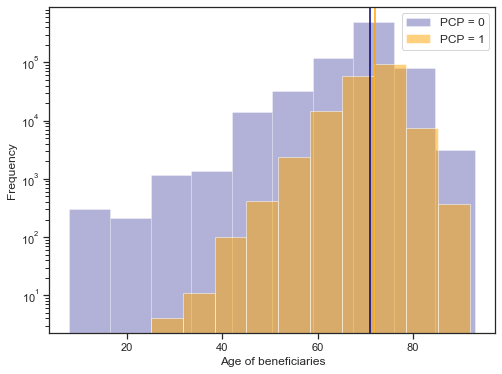

In [34]:
selected_dat[selected_dat.pcp == 0].beneficiary_average_age.plot(kind='hist', logy=True, alpha=0.3, label='PCP = 0', color = "navy", figsize=(8,6))
selected_dat[selected_dat.pcp == 1].beneficiary_average_age.plot(kind = "hist", logy = True, alpha = 0.5, label = 'PCP = 1', color = "orange", figsize = (8,6))
plt.axvline(selected_dat[selected_dat.pcp == 0].beneficiary_average_age.median(), color='navy', label='')
plt.axvline(selected_dat[selected_dat.pcp == 1].beneficiary_average_age.median(), color = 'orange', label ='')
plt.legend(loc=1, fontsize='medium')
plt.xlabel('Age of beneficiaries')
plt.ylabel('Frequency')

The distribution of age is a bit different in both classes. Pcp = 0 has a higher frequency of younger age groups. Internal medicine is mostly for adults, but family practice is also only >30 which is a bit odd because family practise should be looking at a wider span of ages in a family. Perhaps the average age in the family is skewed to a higher number because of older parents.

Exploring the age piece a bit further below, I found that there are higher numbers of beneficiaries within the lower age groups for pcp = 0 also. This implies very young patients in the pcp = 0 (other specialties). 

In [43]:
selected_dat.groupby(selected_dat.pcp)['beneficiary_age_less_65_count'].describe()

,count,mean,std,min,25%,50%,75%,max
pcp,,,,,,,,
0,490682.0,89.612195,129.137457,0.0,27.0,50.0,100.0,10588.0
1,143923.0,62.918936,61.932562,0.0,26.0,46.0,79.0,4201.0


In [44]:
selected_dat.groupby(selected_dat.pcp)['Normalized_total_medicare_payment'].describe()

,count,mean,std,min,25%,50%,75%,max
pcp,,,,,,,,
0,745612.0,292.117544,491.049931,0.000000,103.741139,173.950852,329.633348,95571.604634
1,179733.0,241.427294,297.365585,1.015882,138.014306,200.184889,282.220748,79539.884231


In [195]:
selected_dat.groupby(selected_dat.pcp)['beneficiary_average_age'].describe()

,count,mean,std,min,25%,50%,75%,max
pcp,,,,,,,,
0,745612.0,69.868715,6.697947,8.0,68.0,71.0,74.0,93.0
1,179733.0,71.610027,4.850871,25.0,69.0,72.0,75.0,92.0


Text(0, 0.5, 'Frequency')

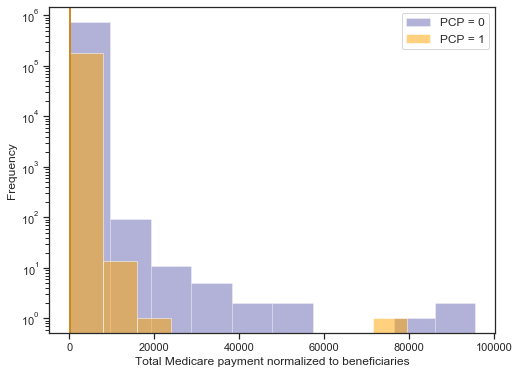

In [15]:
selected_dat[selected_dat.pcp == 0].Normalized_total_medicare_payment.plot(kind='hist', logy=True, alpha=0.3, label='PCP = 0', color = "navy", figsize=(8,6))
selected_dat[selected_dat.pcp == 1].Normalized_total_medicare_payment.plot(kind = "hist", logy = True, alpha = 0.5, label = 'PCP = 1', color = "orange", figsize = (8,6))
plt.axvline(selected_dat[selected_dat.pcp == 0].Normalized_total_medicare_payment.median(), color='navy', label='')
plt.axvline(selected_dat[selected_dat.pcp == 1].Normalized_total_medicare_payment.median(), color = 'orange', label ='')
plt.legend(loc=1, fontsize='medium')
plt.xlabel('Total Medicare payment normalized to beneficiaries')
plt.ylabel('Frequency')

Payments are more distributed for pcp = 0 with family practice or internal medicine having comparably lower nomalized payment. The 25th and 50th percentile of medicare payment is higher for class pcp = 1. The payments in the 75th percentile is higher for the other specialties (as seen in the table). The distributions show clear differences in both classes in terms of payment distributions. 

Text(0.5, 0, 'PCP (Internal Medicine or Family Practice vs other providers)')

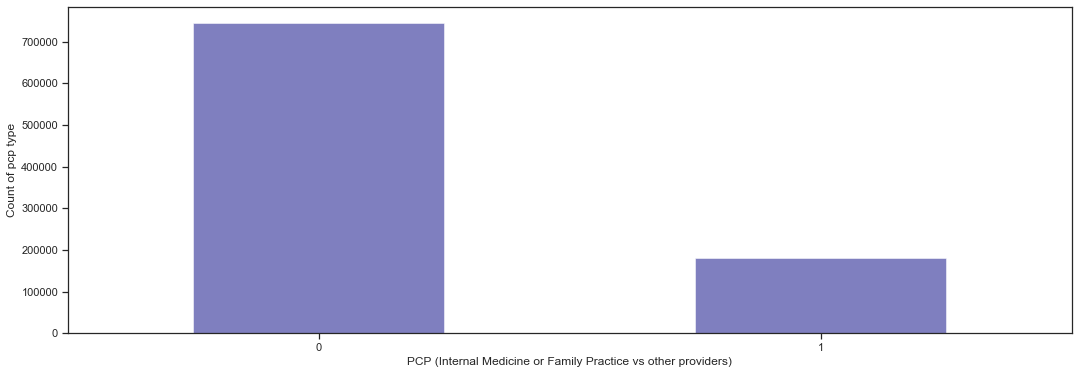

In [51]:
#imbalance in data
ax = selected_dat.groupby("pcp").npi.count().plot(kind="bar", color ="navy", alpha = 0.5)
ax.tick_params(axis='x', rotation=0)
ax.set_ylabel("Count of pcp type")
ax.set_xlabel("PCP (Internal Medicine or Family Practice vs other providers)")

In [51]:
selected_dat.groupby("pcp").npi.count() #high imbalance will deal with it eventually using SMOTE

pcp
0    745612
1    179733
Name: npi, dtype: int64

There is an imbalance in the classes. I will aaccount for that when developing the model.

Text(0.5, 0, 'PCP (Internal Medicine or Family Practice vs other providers)')

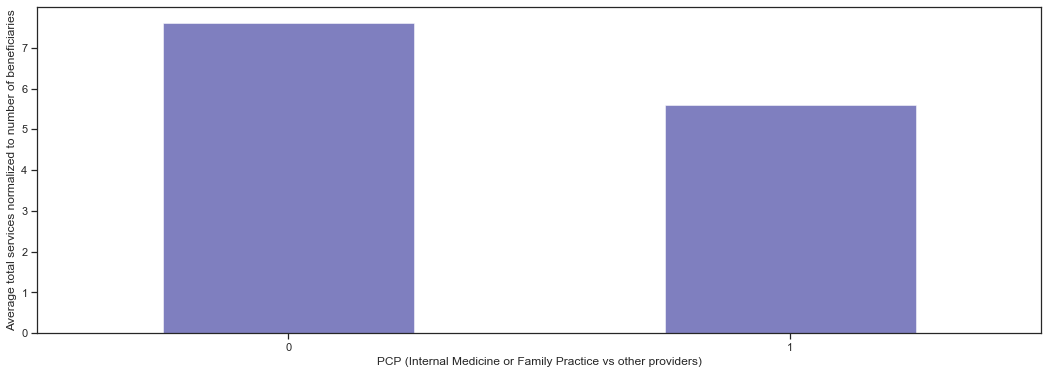

In [38]:
ax = selected_dat.groupby("pcp")['Normalized_total_services'].mean().plot(kind="bar", color ="navy", alpha = 0.5)
ax.tick_params(axis='x', rotation=0)
ax.set_ylabel("Average total services normalized to number of beneficiaries")
ax.set_xlabel("PCP (Internal Medicine or Family Practice vs other providers)")

On average, the services rendered by the provider to each beneficiary is higher in other specialties (pcp = 0). 

Text(0.5, 0, 'PCP (Internal Medicine or Family Practice vs other providers)')

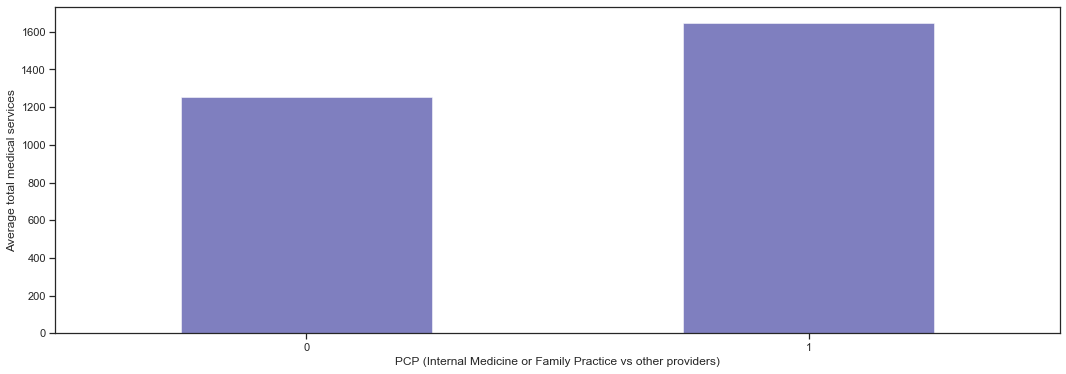

In [28]:
ax1 = selected_dat.groupby("pcp")['total_med_services'].mean().plot(kind="bar", color ="navy", alpha = 0.5)
ax1.tick_params(axis='x', rotation=0)
ax1.set_ylabel("Average total medical services")
ax1.set_xlabel("PCP (Internal Medicine or Family Practice vs other providers)")


Text(0.5, 0, 'PCP (Internal Medicine or Family Practice vs other providers)')

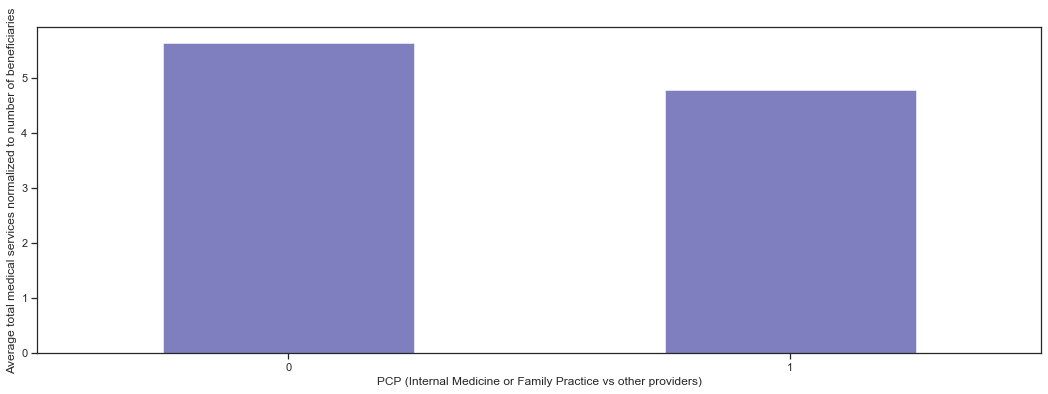

In [29]:
ax2 = selected_dat.groupby("pcp")['Normalized_med_services'].mean().plot(kind="bar", color ="navy", alpha = 0.5)
ax2.tick_params(axis='x', rotation=0)
ax2.set_ylabel("Average total medical services normalized to number of beneficiaries")
ax2.set_xlabel("PCP (Internal Medicine or Family Practice vs other providers)")

When counting all med services, these seem higher for pcp = 1, but when normalized to the unique medical beneficiaries, they remain higher for pcp = 0. This is important to note making normalization an important piece in further analysis.

Text(0.5, 0, 'PCP (Internal Medicine or Family Practice vs other providers)')

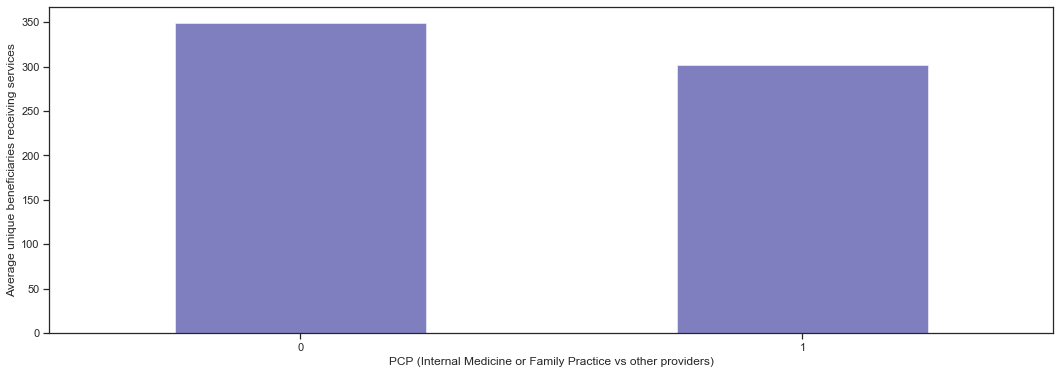

In [54]:
ax = selected_dat.groupby("pcp")['total_unique_benes'].mean().plot(kind="bar", color ="navy", alpha = 0.5)
ax.tick_params(axis='x', rotation=0)
ax.set_ylabel("Average unique beneficiaries receiving services")
ax.set_xlabel("PCP (Internal Medicine or Family Practice vs other providers)")

In [183]:
#checking for difference in credential types of the providers in either classes of pcp
selected_dat.groupby("pcp").nppes_credentials.unique()

pcp
0    [M.D., MD, N. P., DNP, FNP, P.A., PA-C, PSY.D....
1    [M.D., D.O., MD, DO, nan, M.D, ML, MD, PHD, M....
Name: nppes_credentials, dtype: object

I also wanted to check for any credential differences between the two classed and found that the intersection between both class types yielded a large list of degrees. Meaning negligible difference in the credential of the providers in either clas types.

From the above data exploration, it is evident that the class types of pcp have differences. They differ in size, the age groups of beneficiaries they tend to, have differences in payments, and average risk scores of beneficiaries. The last one directly feeds into the payments to the provider piece. The severity of the risk of the patient must affect the provider's care. There are additional details about the beneficiary's health risks which could be interesting to explore further through the models. 

# Feature selection (correlations)

[Text(0.5, 0, 'number_of_hcpcs'),
 Text(1.5, 0, 'total_services'),
 Text(2.5, 0, 'total_unique_benes')]

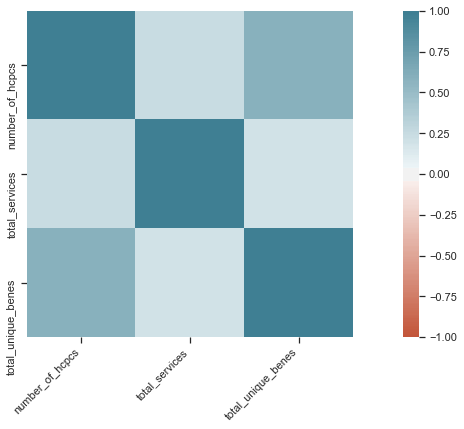

In [22]:
#checking for correlations in the top 3 features in the numerical data without the index labels
numerical_data = numerical_data.drop(labels=['npi', 'index'], axis=1)
corr = numerical_data.corr()

ax = sns.heatmap(
corr.iloc[0:3,0:3],
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True)
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=45,
horizontalalignment='right')

In [11]:
#checking for correlations amongst all features only on training set to prevent overfitting

from sklearn.model_selection import train_test_split
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    numerical_data.drop(labels=['pcp'], axis=1),
    numerical_data['pcp'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((647742, 55), (277605, 55))

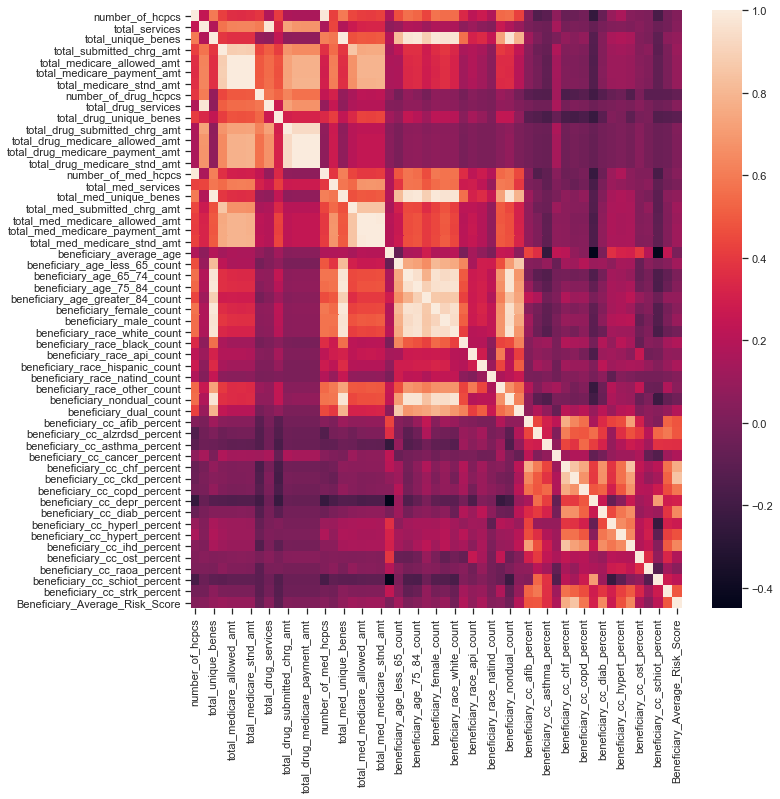

In [25]:
# visualise correlated features 
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

I found high correlations between several features in the data. In the following piece, I find groups of features with high correlations and decide to remove the redundant ones from the data before performing a preditive model.

In [13]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat

,feature1,feature2,corr
0,total_unique_benes,total_med_unique_benes,0.999998
1,total_med_unique_benes,total_unique_benes,0.999998
2,npi,index,0.999917
3,index,npi,0.999917
4,total_drug_medicare_allowed_amt,total_drug_medicare_payment_amt,0.999883
...,...,...,...
121,beneficiary_age_less_65_count,total_med_unique_benes,0.820768
122,total_unique_benes,beneficiary_age_less_65_count,0.819088
123,beneficiary_age_less_65_count,total_unique_benes,0.819088
124,beneficiary_age_less_65_count,beneficiary_female_count,0.812754


In [270]:
# find groups of correlated features to find redundancies

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 9 correlated groups
out of 53 total features


In [271]:
# Now I can visualise each group. There are 9 correlated feature groups that offer correlations.
# This helps in breaking the data down to major groups and eliminating some features that are highly correlated.

for group in correlated_groups:
    print(group)
    print()

               feature1                          feature2      corr
0    total_unique_benes            total_med_unique_benes  0.999998
22   total_unique_benes          beneficiary_female_count  0.984385
27   total_unique_benes       beneficiary_age_75_84_count  0.983027
36   total_unique_benes      beneficiary_race_white_count  0.975118
41   total_unique_benes         beneficiary_nondual_count  0.972188
45   total_unique_benes       beneficiary_age_65_74_count  0.971757
48   total_unique_benes            beneficiary_male_count  0.969110
84   total_unique_benes  beneficiary_age_greater_84_count  0.889942
121  total_unique_benes     beneficiary_age_less_65_count  0.819088

                           feature1                         feature2      corr
2   total_drug_medicare_allowed_amt     total_drug_medicare_stnd_amt  0.999883
5   total_drug_medicare_allowed_amt  total_drug_medicare_payment_amt  0.999883
75  total_drug_medicare_allowed_amt    total_drug_submitted_chrg_amt  0.933537

  

You can see that some groups have very high correlations.

In [273]:
# investigating further features within one group.
# let's for example select group 0

group = correlated_groups[0]
group

,feature1,feature2,corr
0,total_unique_benes,total_med_unique_benes,0.999998
22,total_unique_benes,beneficiary_female_count,0.984385
27,total_unique_benes,beneficiary_age_75_84_count,0.983027
36,total_unique_benes,beneficiary_race_white_count,0.975118
41,total_unique_benes,beneficiary_nondual_count,0.972188
45,total_unique_benes,beneficiary_age_65_74_count,0.971757
48,total_unique_benes,beneficiary_male_count,0.969110
84,total_unique_benes,beneficiary_age_greater_84_count,0.889942
121,total_unique_benes,beneficiary_age_less_65_count,0.819088


In [274]:
# we could select the features with less missing data. Total unique benes have no missing values. 

for feature in list(group.feature2.unique())+['total_unique_benes']:
    print(X_train[feature].isnull().sum())

71542
70396
183226
215602
153197
104943
70396
248944
203658
0


In [275]:
from sklearn.ensemble import RandomForestClassifier

features = list(group.feature2.unique())+['total_unique_benes']
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4) 
#the parameters account for enough n_estimators and depth to work well. The values are around the default parameters.

rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=39, verbose=0,
                       warm_start=False)

In [276]:
# we get the feature importance attributed by the random forest model

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

,feature,importance
7,beneficiary_age_greater_84_count,0.213191
0,total_med_unique_benes,0.207759
6,beneficiary_male_count,0.137243
9,total_unique_benes,0.108437
1,beneficiary_female_count,0.108058
5,beneficiary_age_65_74_count,0.094857
2,beneficiary_age_75_84_count,0.057242
4,beneficiary_nondual_count,0.035412
8,beneficiary_age_less_65_count,0.027693
3,beneficiary_race_white_count,0.010107


In this case, feature beneficiary_age_greater_84_count shows the higher importance according to random forests. I could select only that feature, and remove all the remaining features from this group from the dataset. I did not implement this method, but wanted to try it to gauge the importances. Instead, I chose to keep features that intuitively made mroe sense to retain. 

Because I have normalized the payments and services by the respective corresponding unique beneficiaries (different based on the treatment type drug or medical). I removed the number of beneficiaries entirely.

# Feature Selection
Furthermore, I created a new dataframe with some engineered features.

In [45]:
#dropping some columns that were redundant (this is post-correlation from the steps above)
dat_to_analyze = selected_dat.drop(labels=['npi', 'index','beneficiary_female_count','beneficiary_male_count',
                                           'total_medicare_payment_amt', 'total_services','total_submitted_chrg_amt',
                                           'total_med_services','total_drug_services','total_medicare_allowed_amt',
                                           'total_medicare_stnd_amt','total_med_unique_benes',
                                           'total_drug_medicare_allowed_amt', 'total_drug_medicare_stnd_amt',
                                           'total_drug_submitted_chrg_amt','total_medicare_allowed_amt', 
                                           'total_medicare_stnd_amt', 'total_submitted_chrg_amt',
                                           'total_med_medicare_allowed_amt', 'total_med_medicare_stnd_amt',
                                           'total_med_submitted_chrg_amt','total_drug_medicare_payment_amt',
                                           'total_med_medicare_payment_amt','total_unique_benes','total_med_unique_benes',
                                           'total_drug_unique_benes','beneficiary_age_less_65_count', 
                                           'beneficiary_age_65_74_count','beneficiary_age_75_84_count',
                                           'beneficiary_age_greater_84_count', 'beneficiary_race_other_count',
                                           'beneficiary_nondual_count','Normalized_total_medicare_payment',
                                           'Normalized_total_services','Normalized_med_services',
                                           'number_of_med_hcpcs', 'number_of_drug_hcpcs'], axis=1)


The new data frame has a new column with the ratio of female beneficiaries (that directly informs the ratio of the males). I added the normalized columns for total services and payments. They were normalized to their corresponding unique beneficiaries. 
Furthermore, I also added three new columns of the ratio of counts for age brackets <65, 65-74, and 74-84. This would inform the >84 bracket directly.  

In [46]:
dat_to_analyze["Ratio_female_beneficiaries"] = selected_dat.beneficiary_female_count/selected_dat.total_unique_benes

In [47]:
dat_to_analyze["Normalized_total_medicare_payment"] = selected_dat.total_medicare_payment_amt/selected_dat.total_unique_benes

#the drug medicare payment had a lot os missing values and 0, so I did not account for it in the model.
#dat_to_analyze["Normalized_drug_medicare_payment"] = selected_dat.total_drug_medicare_payment_amt.fillna(0)/selected_dat.total_drug_unique_benes

dat_to_analyze["Normalized_med_medicare_payment"] = selected_dat.total_med_medicare_payment_amt/selected_dat.total_med_unique_benes


In [48]:
dat_to_analyze["Normalized_total_services"] = selected_dat.total_services/selected_dat.total_unique_benes
dat_to_analyze["Normalized_med_services"] = selected_dat.total_med_services.fillna(0)/selected_dat.total_med_unique_benes
#dat_to_analyze["Normalized_drug_total_services"] = selected_dat.total_drug_services/selected_dat.total_drug_unique_benes

In [49]:
dat_to_analyze["Ratio_beneficiary_age_less_65_count"] = selected_dat.beneficiary_age_less_65_count/selected_dat.total_unique_benes
dat_to_analyze["Ratio_beneficiary_age_65_74_count"] = selected_dat.beneficiary_age_65_74_count.fillna(0)/selected_dat.total_unique_benes
dat_to_analyze["Ratio_beneficiary_age_75_84_count"] = selected_dat.beneficiary_age_75_84_count.fillna(0)/selected_dat.total_unique_benes

In [50]:
dat_to_analyze.head()

,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,...,Beneficiary_Average_Risk_Score,pcp,Ratio_female_beneficiaries,Normalized_total_medicare_payment,Normalized_med_medicare_payment,Normalized_total_services,Normalized_med_services,Ratio_beneficiary_age_less_65_count,Ratio_beneficiary_age_65_74_count,Ratio_beneficiary_age_75_84_count
0,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,2.2206,1,0.552026,212.566364,212.566364,3.010953,3.010953,0.177437,0.303395,0.325301
1,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,602011718,...,1.0007,0,0.526660,57.381745,57.381745,2.021282,2.021282,0.023854,0.434051,0.350795
2,KHALIL,RASHID,NaN,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,436233536,...,1.7777,0,0.569697,314.060848,314.060848,3.963636,3.963636,0.630303,0.224242,0.000000
3,GIRARDI,DAVID,J,D.O.,M,I,456 MAGEE AVE,NaN,PATTON,166681219,...,1.7228,1,0.586735,218.533265,218.533265,2.581633,2.581633,0.224490,0.209184,0.262755
4,VELOTTA,JENNIFER,A,M.D.,F,I,11100 EUCLID AVE,NaN,CLEVELAND,441061716,...,0.9101,0,1.000000,166.519474,NaN,5.140351,NaN,0.473684,0.315789,0.000000


[Text(0.5, 0, 'number_of_hcpcs'),
 Text(1.5, 0, 'beneficiary_average_age'),
 Text(2.5, 0, 'beneficiary_race_white_count'),
 Text(3.5, 0, 'beneficiary_race_black_count'),
 Text(4.5, 0, 'beneficiary_race_api_count')]

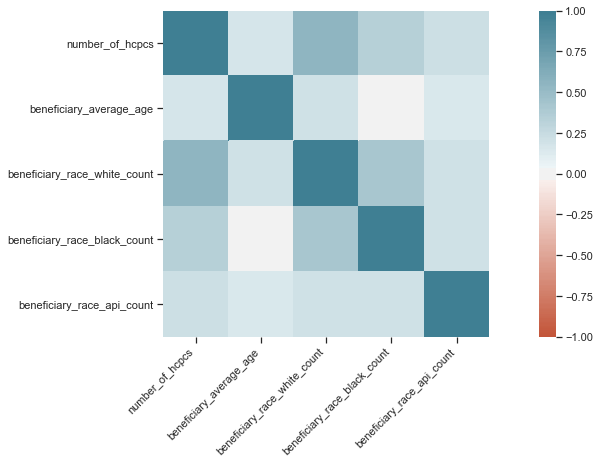

In [32]:
#The correlations look a lot better (reduced) now and between categories that intuitively seem different. 
#eg. average age and race

#checking for correlations in top 5 features
corr = dat_to_analyze.corr()

ax = sns.heatmap(
corr.iloc[0:5,0:5],
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(20, 220, n=200),
square=True)
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=45,
horizontalalignment='right')

In [51]:
from sklearn.model_selection import train_test_split

# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    dat_to_analyze.drop(labels=['pcp'], axis=1),
    dat_to_analyze['pcp'],
    test_size=0.25,
    random_state=0)

X_train.shape, X_test.shape

((694008, 49), (231337, 49))

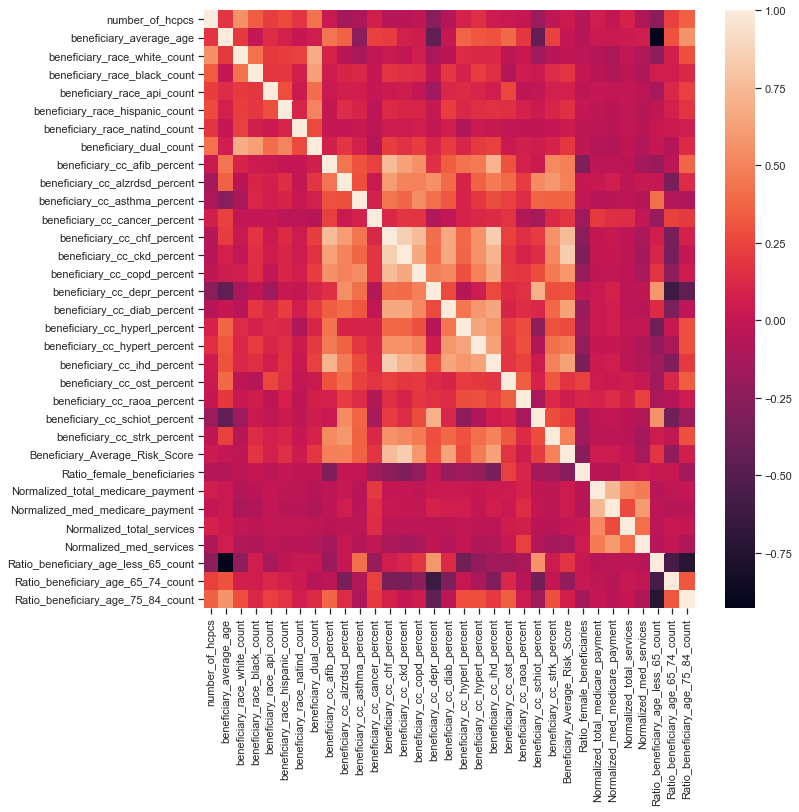

In [101]:
# visualise correlated features only for the training set
# correlation of all features (for all possible feature combinations)

corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [102]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat

,feature1,feature2,corr
0,beneficiary_average_age,Ratio_beneficiary_age_less_65_count,0.928653
1,Ratio_beneficiary_age_less_65_count,beneficiary_average_age,0.928653
2,beneficiary_cc_ckd_percent,beneficiary_cc_chf_percent,0.851627
3,beneficiary_cc_chf_percent,beneficiary_cc_ckd_percent,0.851627
4,Beneficiary_Average_Risk_Score,beneficiary_cc_ckd_percent,0.849076
5,beneficiary_cc_ckd_percent,Beneficiary_Average_Risk_Score,0.849076
6,beneficiary_cc_chf_percent,beneficiary_cc_ihd_percent,0.846194
7,beneficiary_cc_ihd_percent,beneficiary_cc_chf_percent,0.846194


In [103]:
# find groups of correlated features
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 3 correlated groups
out of 49 total features


In [104]:
#correlations are majorly fixed

for group in correlated_groups:
    print(group)
    print()

                  feature1                             feature2      corr
0  beneficiary_average_age  Ratio_beneficiary_age_less_65_count  0.928653

                     feature1                        feature2      corr
2  beneficiary_cc_ckd_percent      beneficiary_cc_chf_percent  0.851627
5  beneficiary_cc_ckd_percent  Beneficiary_Average_Risk_Score  0.849076

                     feature1                    feature2      corr
7  beneficiary_cc_ihd_percent  beneficiary_cc_chf_percent  0.846194



The correlations from the new groups seem better with more non-intuitive and less redundant features showing correlations. This severity of the beneficiaries seem to be standing out now which makes sense in predicting the type of care they may need. 

# Data processing

# Categorical data
Now I will handle the categorical data. I explored the provider's details namely the place, city, zip codes, etc. It would make sense to use latitude/longitude data if the two classes of pcp have providers from different places. 

In [52]:
# Categorical boolean mask
categorical_feature_mask = dat_to_analyze.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = dat_to_analyze.columns[categorical_feature_mask].tolist()

In [19]:
categorical_cols

['nppes_provider_last_org_name',
 'nppes_provider_first_name',
 'nppes_provider_mi',
 'nppes_credentials',
 'nppes_provider_gender',
 'nppes_entity_code',
 'nppes_provider_street1',
 'nppes_provider_street2',
 'nppes_provider_city',
 'nppes_provider_zip',
 'nppes_provider_state',
 'nppes_provider_country',
 'provider_type',
 'medicare_participation_indicator',
 'drug_suppress_indicator',
 'med_suppress_indicator']

In [201]:
# high commonality in places

places0 = dat_to_analyze[dat_to_analyze.pcp == 0].nppes_provider_city
places1 = dat_to_analyze[dat_to_analyze.pcp == 1].nppes_provider_city

def compare_intersect(x, y):
    return frozenset(x).intersection(y)
compare_intersect(places0,places1)

frozenset({'WATAUGA',
           'DODGE CITY',
           'COALPORT',
           'OCEANA',
           'BOYLSTON',
           'LAVALETTE',
           'RESEDA',
           'ELON',
           'INMAN',
           'COLLEGEVILLE',
           'CALIFORNIA',
           'ELBURN',
           'DEPOSIT',
           'EAST ROCHESTER',
           'HINSDALE',
           'DAVISON',
           'WYCKOFF',
           'WEST PLAINS',
           'KEIZER',
           'CORE',
           'PITCAIRN',
           'SUMMERVILLE',
           'PORT JEFFERSON STATION',
           'NORTH BRANCH',
           'SIOUX FALLS',
           'SOMERDALE',
           'DE PERE',
           'MIDDLEBURG',
           'LONG GROVE',
           'BRIMLEY',
           'MARYLAND HEIGHTS',
           'HAINES',
           'HIAWATHA',
           'PENNINGTON GAP',
           'DUNCAN',
           'LONDONDERRY',
           'ALLEN',
           'CLOSTER',
           'SHEPHERD',
           'WEST POINT',
           'LUSBY',
           'SCOTLAND',
    

In [208]:
# high commonality in states

places0 = dat_to_analyze[dat_to_analyze.pcp == 0].nppes_provider_state
places1 = dat_to_analyze[dat_to_analyze.pcp == 1].nppes_provider_state

def compare_intersect(x, y):
    return frozenset(x).intersection(y)
compare_intersect(places0,places1)

frozenset({'AA',
           'AE',
           'AK',
           'AL',
           'AP',
           'AR',
           'AZ',
           'CA',
           'CO',
           'CT',
           'DC',
           'DE',
           'FL',
           'GA',
           'GU',
           'HI',
           'IA',
           'ID',
           'IL',
           'IN',
           'KS',
           'KY',
           'LA',
           'MA',
           'MD',
           'ME',
           'MI',
           'MN',
           'MO',
           'MP',
           'MS',
           'MT',
           'NC',
           'ND',
           'NE',
           'NH',
           'NJ',
           'NM',
           'NV',
           'NY',
           'OH',
           'OK',
           'OR',
           'PA',
           'PR',
           'RI',
           'SC',
           'SD',
           'TN',
           'TX',
           'UT',
           'VA',
           'VI',
           'VT',
           'WA',
           'WI',
           'WV',
           'WY',
           'XX

In [209]:
# There is only a subsection of countries that are common, 
# so I decided to create dummy variables for only the countries in the following analyses.

places0 = dat_to_analyze[dat_to_analyze.pcp == 0].nppes_provider_country
places1 = dat_to_analyze[dat_to_analyze.pcp == 1].nppes_provider_country

def compare_intersect(x, y):
    return frozenset(x).intersection(y)
compare_intersect(places0,places1)


frozenset({'DE', 'IL', 'IN', 'IT', 'KR', 'SA', 'TR', 'US'})

In [53]:
# Matrix of independent and dependent variable 

X = dat_to_analyze.drop(labels=['pcp', 'provider_type'], axis=1) # independent variables
y = dat_to_analyze['pcp'] # dependent variables
X.ndim, y.ndim

(2, 1)

In [21]:
X

,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,...,beneficiary_cc_strk_percent,Beneficiary_Average_Risk_Score,Ratio_female_beneficiaries,Normalized_total_medicare_payment,Normalized_med_medicare_payment,Normalized_total_services,Normalized_med_services,Ratio_beneficiary_age_less_65_count,Ratio_beneficiary_age_65_74_count,Ratio_beneficiary_age_75_84_count
0,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,20.0,2.2206,0.552026,212.566364,212.566364,3.010953,3.010953,0.177437,0.303395,0.325301
1,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,602011718,...,3.0,1.0007,0.526660,57.381745,57.381745,2.021282,2.021282,0.023854,0.434051,0.350795
2,KHALIL,RASHID,NaN,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,436233536,...,NaN,1.7777,0.569697,314.060848,314.060848,3.963636,3.963636,0.630303,0.224242,0.000000
3,GIRARDI,DAVID,J,D.O.,M,I,456 MAGEE AVE,NaN,PATTON,166681219,...,10.0,1.7228,0.586735,218.533265,218.533265,2.581633,2.581633,0.224490,0.209184,0.262755
4,VELOTTA,JENNIFER,A,M.D.,F,I,11100 EUCLID AVE,NaN,CLEVELAND,441061716,...,NaN,0.9101,1.000000,166.519474,NaN,5.140351,NaN,0.473684,0.315789,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925342,MOLAI,INDIRA,NaN,M.D.,F,I,19735 GERMANTOWN RD,STE 100,GERMANTOWN,208741214,...,NaN,0.9611,0.661017,272.948023,240.787514,9.169492,8.508475,0.163842,0.508475,0.242938
925343,YUEN,JENNY,F,"O.D., F.A.A.O",F,I,195 PEABODY ST,NaN,SAN FRANCISCO,941342809,...,NaN,1.0702,0.636364,108.387013,108.387013,1.207792,1.207792,NaN,0.246753,0.493506
925344,MAREK,NORMAN,F,D.C.,M,I,1355 FOUR MILE DR,NaN,WILLIAMSPORT,177011932,...,0.0,0.8628,0.540541,77.272973,77.272973,3.027027,3.027027,NaN,0.405405,0.297297
925345,DESCHENES,GEOFFREY,R,M.D.,M,I,1100 9TH AVE,MS:M4-PFS,SEATTLE,981012756,...,5.0,1.1005,0.543520,212.481625,212.481625,1.953578,1.953578,0.096712,0.446809,0.294004


There is only a subsection of countries that are common, so I decided to create dummy variables for only the countries in the following analyses. Iremoved most other categorical information for this model and only used a subset of the categorical features that stood out to be different for the providers (namely nppes_provider_gender,medicare_participation_indicator,drug_suppress_indicator, and med_suppress_indicator) 

# Data imputation for both data types
I needed to fill the missing values for both categorical and numerical data

In [54]:
#I used the following class to deal with missing values in both data types

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


X = pd.DataFrame(X)
xt = DataFrameImputer().fit_transform(X)

print('before...')
print(X)
print('after...')
print(xt)

before...
       nppes_provider_last_org_name nppes_provider_first_name  \
0                         ENKESHAFI                   ARDALAN   
1                            CIBULL                    THOMAS   
2                            KHALIL                    RASHID   
3                           GIRARDI                     DAVID   
4                           VELOTTA                  JENNIFER   
...                             ...                       ...   
925342                        MOLAI                    INDIRA   
925343                         YUEN                     JENNY   
925344                        MAREK                    NORMAN   
925345                    DESCHENES                  GEOFFREY   
925346                        JOFFE                 GABRIELLA   

       nppes_provider_mi nppes_credentials nppes_provider_gender  \
0                    NaN              M.D.                     M   
1                      L              M.D.                     M   
2    

In [55]:
# columns in the new imputed dataframe

xt.columns

Index(['nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip', 'nppes_provider_state',
       'nppes_provider_country', 'medicare_participation_indicator',
       'number_of_hcpcs', 'drug_suppress_indicator', 'med_suppress_indicator',
       'beneficiary_average_age', 'beneficiary_race_white_count',
       'beneficiary_race_black_count', 'beneficiary_race_api_count',
       'beneficiary_race_hispanic_count', 'beneficiary_race_natind_count',
       'beneficiary_dual_count', 'beneficiary_cc_afib_percent',
       'beneficiary_cc_alzrdsd_percent', 'beneficiary_cc_asthma_percent',
       'beneficiary_cc_cancer_percent', 'beneficiary_cc_chf_percent',
       'beneficiary_cc_ckd_percent', 'beneficiary_cc_copd_percent',
       'beneficiary_cc_depr_percent', 'beneficiary_cc_diab_percent',

In [56]:
# only selecting a subset of the following categorical columns (removing some in the following couple code pieces)

categorical_cols

['nppes_provider_last_org_name',
 'nppes_provider_first_name',
 'nppes_provider_mi',
 'nppes_credentials',
 'nppes_provider_gender',
 'nppes_entity_code',
 'nppes_provider_street1',
 'nppes_provider_street2',
 'nppes_provider_city',
 'nppes_provider_zip',
 'nppes_provider_state',
 'nppes_provider_country',
 'provider_type',
 'medicare_participation_indicator',
 'drug_suppress_indicator',
 'med_suppress_indicator']

In [57]:
categorical_cols.remove('nppes_credentials')
categorical_cols.remove('nppes_provider_last_org_name')
categorical_cols.remove('nppes_provider_first_name')
categorical_cols.remove('nppes_provider_mi')
categorical_cols.remove('nppes_provider_street1')
categorical_cols.remove('nppes_provider_street2')
categorical_cols.remove('provider_type')
categorical_cols.remove('nppes_provider_state')
categorical_cols.remove('nppes_provider_zip')
categorical_cols.remove('nppes_entity_code')
categorical_cols.remove('nppes_provider_city')
categorical_cols.remove('nppes_provider_country')

In [58]:
#these and the country of the provider type are the categorical columns I chose to use in the model development 

categorical_cols

['nppes_provider_gender',
 'medicare_participation_indicator',
 'drug_suppress_indicator',
 'med_suppress_indicator']

In [59]:
# one hot encode the nppes_provider_country

xt = pd.get_dummies(data=xt, columns=["nppes_provider_country"])
xt.head(5)
# I did not drop_first here, though that might be something to examine later

,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,...,nppes_provider_country_KW,nppes_provider_country_KY,nppes_provider_country_NL,nppes_provider_country_NO,nppes_provider_country_PK,nppes_provider_country_SA,nppes_provider_country_TH,nppes_provider_country_TR,nppes_provider_country_US,nppes_provider_country_VE
0,ENKESHAFI,ARDALAN,A,M.D.,M,I,900 SETON DR,SUITE 200,CUMBERLAND,215021854,...,0,0,0,0,0,0,0,0,1,0
1,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,602011718,...,0,0,0,0,0,0,0,0,1,0
2,KHALIL,RASHID,A,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,436233536,...,0,0,0,0,0,0,0,0,1,0
3,GIRARDI,DAVID,J,D.O.,M,I,456 MAGEE AVE,SUITE 200,PATTON,166681219,...,0,0,0,0,0,0,0,0,1,0
4,VELOTTA,JENNIFER,A,M.D.,F,I,11100 EUCLID AVE,SUITE 200,CLEVELAND,441061716,...,0,0,0,0,0,0,0,0,1,0


In [60]:
# import labelencoder for the other categorical sub types

from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [61]:
# apply le on categorical feature columns

xt[categorical_cols] = xt[categorical_cols].apply(lambda col: le.fit_transform(col))
xt[categorical_cols].head(10)
xt
#provider gender male = 1

,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,nppes_provider_zip,...,nppes_provider_country_KW,nppes_provider_country_KY,nppes_provider_country_NL,nppes_provider_country_NO,nppes_provider_country_PK,nppes_provider_country_SA,nppes_provider_country_TH,nppes_provider_country_TR,nppes_provider_country_US,nppes_provider_country_VE
0,ENKESHAFI,ARDALAN,A,M.D.,1,I,900 SETON DR,SUITE 200,CUMBERLAND,215021854,...,0,0,0,0,0,0,0,0,1,0
1,CIBULL,THOMAS,L,M.D.,1,I,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,602011718,...,0,0,0,0,0,0,0,0,1,0
2,KHALIL,RASHID,A,M.D.,1,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,436233536,...,0,0,0,0,0,0,0,0,1,0
3,GIRARDI,DAVID,J,D.O.,1,I,456 MAGEE AVE,SUITE 200,PATTON,166681219,...,0,0,0,0,0,0,0,0,1,0
4,VELOTTA,JENNIFER,A,M.D.,0,I,11100 EUCLID AVE,SUITE 200,CLEVELAND,441061716,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925342,MOLAI,INDIRA,A,M.D.,0,I,19735 GERMANTOWN RD,STE 100,GERMANTOWN,208741214,...,0,0,0,0,0,0,0,0,1,0
925343,YUEN,JENNY,F,"O.D., F.A.A.O",0,I,195 PEABODY ST,SUITE 200,SAN FRANCISCO,941342809,...,0,0,0,0,0,0,0,0,1,0
925344,MAREK,NORMAN,F,D.C.,1,I,1355 FOUR MILE DR,SUITE 200,WILLIAMSPORT,177011932,...,0,0,0,0,0,0,0,0,1,0
925345,DESCHENES,GEOFFREY,R,M.D.,1,I,1100 9TH AVE,MS:M4-PFS,SEATTLE,981012756,...,0,0,0,0,0,0,0,0,1,0


In [62]:
# drop the rest of the categorical columns (eg. name, city, zipcode, address, entity code (they are all individuals)

xt.drop(['nppes_provider_last_org_name', 'nppes_provider_first_name', 'nppes_provider_state','nppes_provider_zip','nppes_entity_code',
                'nppes_provider_city','nppes_provider_mi', 'nppes_provider_street1','nppes_provider_street2','nppes_credentials']
        , axis=1, inplace=True)

In [63]:
xt.columns

Index(['nppes_provider_gender', 'medicare_participation_indicator',
       'number_of_hcpcs', 'drug_suppress_indicator', 'med_suppress_indicator',
       'beneficiary_average_age', 'beneficiary_race_white_count',
       'beneficiary_race_black_count', 'beneficiary_race_api_count',
       'beneficiary_race_hispanic_count', 'beneficiary_race_natind_count',
       'beneficiary_dual_count', 'beneficiary_cc_afib_percent',
       'beneficiary_cc_alzrdsd_percent', 'beneficiary_cc_asthma_percent',
       'beneficiary_cc_cancer_percent', 'beneficiary_cc_chf_percent',
       'beneficiary_cc_ckd_percent', 'beneficiary_cc_copd_percent',
       'beneficiary_cc_depr_percent', 'beneficiary_cc_diab_percent',
       'beneficiary_cc_hyperl_percent', 'beneficiary_cc_hypert_percent',
       'beneficiary_cc_ihd_percent', 'beneficiary_cc_ost_percent',
       'beneficiary_cc_raoa_percent', 'beneficiary_cc_schiot_percent',
       'beneficiary_cc_strk_percent', 'Beneficiary_Average_Risk_Score',
       'Ratio_f

Having processed the features and handled correlations, I can now apply machine learning algorithms on the data. The data has several engineered features.

# Applying machine learning on data

In [64]:
# Splitting the dataset into Training and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(xt, y, 
                                                  test_size=0.25, 
                                                  random_state=0)

## Feature scaling

In [65]:
#feature scaling

from sklearn.preprocessing import StandardScaler # StandardScaler class
sc_X = StandardScaler() # creating sc_x, a StandardScaler object

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [33]:
print(X_train) # numbers range between -1 to +1 because of feature scaling
print('--------------------------------------------------------------')
print(X_test) # numbers range between -1 to +1 because of feature scaling
print('--------------------------------------------------------------')
print(y_train) # No feature scaling for classification 
print('--------------------------------------------------------------')
print(y_test) # No feature scaling for classification

[[ 8.17069753e-01  3.02146638e-02 -2.75413117e-01 ... -1.69759226e-03
   9.06302180e-03 -1.20037813e-03]
 [ 8.17069753e-01  3.02146638e-02 -3.03977231e-01 ... -1.69759226e-03
   9.06302180e-03 -1.20037813e-03]
 [ 8.17069753e-01  3.02146638e-02  1.58125425e+00 ... -1.69759226e-03
   9.06302180e-03 -1.20037813e-03]
 ...
 [-1.22388572e+00  3.02146638e-02 -7.32438931e-01 ... -1.69759226e-03
   9.06302180e-03 -1.20037813e-03]
 [ 8.17069753e-01  3.02146638e-02  2.95869150e-01 ... -1.69759226e-03
   9.06302180e-03 -1.20037813e-03]
 [-1.22388572e+00  3.02146638e-02  9.59203562e-02 ... -1.69759226e-03
   9.06302180e-03 -1.20037813e-03]]
--------------------------------------------------------------
[[ 8.17069753e-01  3.02146638e-02  6.10074397e-01 ... -1.69759226e-03
   9.06302180e-03 -1.20037813e-03]
 [ 8.17069753e-01  3.02146638e-02  4.10125603e-01 ... -1.69759226e-03
   9.06302180e-03 -1.20037813e-03]
 [-1.22388572e+00  3.02146638e-02  1.58125425e+00 ... -1.69759226e-03
   9.06302180e-03 -1.

## Are there different class sizes between the two groups?
Next, I handled the imbalances in the data. I tried applying SMOTE, but it was computationally heavy. Because of time constraints, I applied the resample package instead.

In [66]:
# SMOTE was computationally heavy. Ideally I would apply this to make the class size more realist (1:2)
# decision tree on imbalanced dataset with SMOTE oversampling and random undersampling

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [53]:
# decision tree evaluated on imbalanced dataset using roc-auc score

# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.763


In [35]:
# the imbalance is 1:4 

y_train = pd.DataFrame(y_train, columns = ['pcp'])
y_train.pcp.value_counts()

0    559368
1    134640
Name: pcp, dtype: int64

In [67]:
dat = xt #making a new dataframe to handle imbalanced data

In [68]:
dat["pcp"] = dat_to_analyze["pcp"] #new dataframe

Create the test-train splits, and then downsample the majority class of the training data. I downsampled so that
the majority class is 2x the minority. I did not perfectly balance the data in the training set because logistic
regression are more sensitive to drastic imbalance and this creates a more realistic training set.

In [69]:
from sklearn.utils import resample
msk = np.random.rand(len(dat)) < 0.9
train = dat[msk]
test = dat[~msk]

# Separate majority and minority classes
train_majority = train[train.pcp==0]
train_minority = train[train.pcp==1]

# Downsample majority class
train_majority_downsampled = resample(train_majority,replace=False, # sample without replacement
                                      n_samples=len(train_minority)*2, #to be 2x the minority class
                                      random_state=123) # reproducible results

# Combine minority class with downsampled majority class in the trainingset
train_downsampled = pd.concat([train_majority_downsampled, train_minority])
#train_downsampled.converted.value_counts()

In [147]:
train_downsampled.pcp.value_counts() #majority is only twice the number of minority class now

0    323780
1    161890
Name: pcp, dtype: int64

This is a more realistic imbalance in class types.

Get data in the correct format to perform the model fitting.

In [107]:
y_train = np.array(train['pcp'])
y_train_downsampled = np.array(train_downsampled['pcp'])
y_test = np.array(test['pcp'])

# Remove the labels from the features - axis 1 is columns
X_train = train.drop('pcp', axis = 1)
X_train_downsampled= train_downsampled.drop('pcp', axis = 1)
X_test = test.drop('pcp', axis = 1)

# Saving feature names for later use
train_colnames = list(X_train.columns)
train_downsampled_colnames = list(train_downsampled.columns)
test_colnames = list(test.columns)

# Convert to numpy array
X_train = np.array(X_train)
X_train_downsampled = np.array(X_train_downsampled)
X_test = np.array(X_test)

In [108]:
# scale the features
from sklearn.preprocessing import StandardScaler # StandardScaler class
sc_X = StandardScaler() # creating sc_x, a StandardScaler object

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Baseline dummy classifer

In [150]:
# Running a dummy classifer (baseline)
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_downsampled, y_train_downsampled)
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.8063343210358938

## Logistic regression without balancing the data set

In [132]:
# run a logistic regression without balancing the data

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(random_state = 10, solver = 'lbfgs') # this solver is good for larger datasets (default, saga didn't do very well)
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
predictions = logisticRegr.predict(X_test)

predictions_probs = logisticRegr.predict_proba(X_test)
predictions_probs = predictions_probs[:, 1] # keep the probabilities of the positive class only

How is the model with unbalanced data performing?

In [134]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, predictions)
cm1

array([[73368,  1246],
       [16577,  1455]], dtype=int64)

In [135]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.8076225633054854


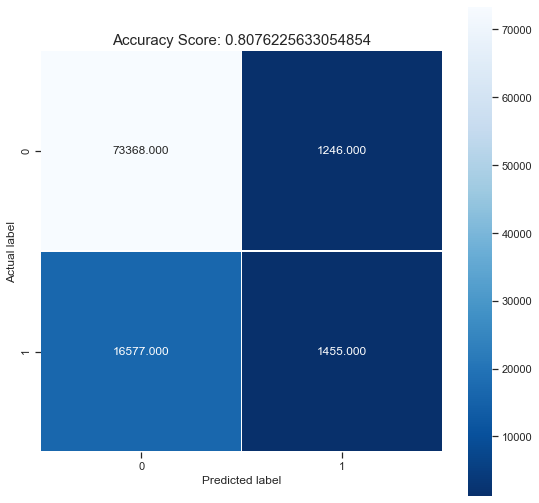

In [136]:
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [137]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.98      0.89     74614
     class 1       0.54      0.08      0.14     18032

    accuracy                           0.81     92646
   macro avg       0.68      0.53      0.52     92646
weighted avg       0.76      0.81      0.75     92646



Accuracy is high but the recall is very low at 0.08. However, since this dataset is imbalanced accuracy is not really the
best metric. Examining the ROC-AUC curve or recall will be more informative since I want to make sure that I
am correctly identifying the provider class type.

In [138]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_probs)

auc = metrics.roc_auc_score(y_test, predictions_probs)

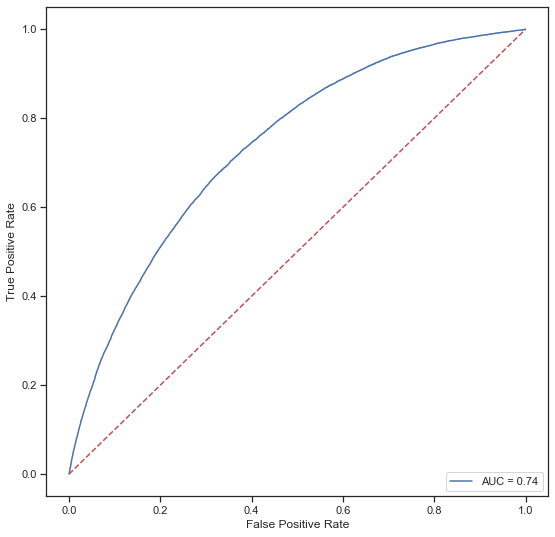

In [139]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Does balancing help the model's recall?

In [122]:
#scale the features
sc_X = StandardScaler() # creating sc_x, a StandardScaler object

X_train_downsampled = sc_X.fit_transform(X_train_downsampled)

In [123]:
# create the logistic regression, this time on the downsampled data

from sklearn.linear_model import LogisticRegression
logisticRegrBalanced = LogisticRegression(random_state = 10, solver = 'lbfgs') 
logisticRegrBalanced.fit(X_train_downsampled, y_train_downsampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
predictions_bal = logisticRegrBalanced.predict(X_test)

predictions_bal_probs = logisticRegrBalanced.predict_proba(X_test)
predictions_bal_probs = predictions_bal_probs[:, 1] # keep the probabilities of the positive class only

In [125]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1_bal = confusion_matrix(y_test, predictions_bal)
cm1_bal

array([[64007, 10607],
       [10739,  7293]], dtype=int64)

In [126]:
# Use score method to get accuracy of model
score = logisticRegrBalanced.score(X_test, y_test)
print(score)

0.769596096971267


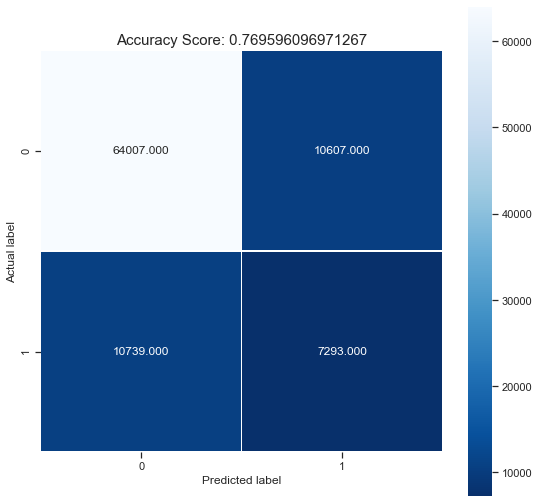

In [127]:
plt.figure(figsize=(9,9))
sns.heatmap(cm1_bal, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [128]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, predictions_bal, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.86      0.86     74614
     class 1       0.41      0.40      0.41     18032

    accuracy                           0.77     92646
   macro avg       0.63      0.63      0.63     92646
weighted avg       0.77      0.77      0.77     92646



The model accuracy does go down to 0.77 with the balanced dataset, however the recall has improved substantially to 0.41.

Whether accuracy or precision/recall is more important in the model depends completely on what the model is going to be used for.  While recall expresses the ability to find the right class, precision expresses the proportion of the data points this model says belongs to one class vs the other. There is a trade off that we need to reach.

In [129]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_bal_probs)

auc = metrics.roc_auc_score(y_test, predictions_bal_probs)

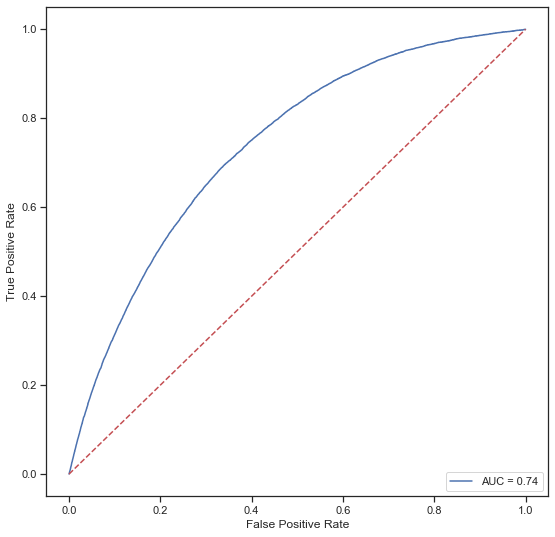

In [131]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [168]:
pd.DataFrame({'features': train_colnames, 'coefficient': logisticRegrBalanced.coef_[0,:]}, columns=['features', 'coefficient']).sort_values(by=['coefficient'],ascending=False)

,features,coefficient
5,beneficiary_average_age,0.417124
18,beneficiary_cc_copd_percent,0.375625
2,number_of_hcpcs,0.287633
20,beneficiary_cc_diab_percent,0.154155
22,beneficiary_cc_hypert_percent,0.147273
...,...,...
30,Normalized_total_medicare_payment,-0.306927
23,beneficiary_cc_ihd_percent,-0.309547
6,beneficiary_race_white_count,-0.437219
15,beneficiary_cc_cancer_percent,-0.567489


Balancing the dataset improved the model performance with an increase in recall. The roc-auc curve is not affected by balancing the dataset. 

Some important features in the logistic regression were the average age of the beneficiary,  
Percent of beneficiaries meeting the CCW chronic condition algorithm for chronic obstructive pulmonary disease and diabetes, Total number of unique HCPCS codes (used to identify the specific medical service).


## Feature selection before running a random forest classifier

Next, I ran a random forest classfier. For this, I first used a wrapper method for feature selection to reduce the number of features significantly,

In [91]:
#Creating a Random Forest Classifer and treating the balanced dataset to it

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score

# SelectFrom model will select those features which importance
# is greater than the mean importance of all the features
# by default, but you can alter this threshold if you want to

sel_ = SelectFromModel(RandomForestClassifier(n_estimators=20))
sel_.fit(X_train_downsampled, y_train_downsampled)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=20, n_jobs=None,
                                                 oob_score=False,


In [92]:
# a list of the selected features

selected_feats = xt.drop('pcp', axis = 1).columns[(sel_.get_support())]

In [93]:
selected_feats

Index(['number_of_hcpcs', 'beneficiary_average_age',
       'beneficiary_race_white_count', 'beneficiary_dual_count',
       'beneficiary_cc_afib_percent', 'beneficiary_cc_alzrdsd_percent',
       'beneficiary_cc_asthma_percent', 'beneficiary_cc_cancer_percent',
       'beneficiary_cc_chf_percent', 'beneficiary_cc_ckd_percent',
       'beneficiary_cc_copd_percent', 'beneficiary_cc_depr_percent',
       'beneficiary_cc_diab_percent', 'beneficiary_cc_hyperl_percent',
       'beneficiary_cc_hypert_percent', 'beneficiary_cc_ihd_percent',
       'beneficiary_cc_raoa_percent', 'beneficiary_cc_schiot_percent',
       'Beneficiary_Average_Risk_Score', 'Ratio_female_beneficiaries',
       'Normalized_total_medicare_payment', 'Normalized_med_medicare_payment',
       'Normalized_total_services', 'Normalized_med_services',
       'Ratio_beneficiary_age_less_65_count',
       'Ratio_beneficiary_age_65_74_count',
       'Ratio_beneficiary_age_75_84_count'],
      dtype='object')

I reduced the number of features used in the Random Forest Classifier

In [94]:
# to compare the amount of selected features with the amount of features which importance is above the
# mean importance, to make sure we understand the output

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients greater than the mean coefficient: {}'.format(
    np.sum(sel_.estimator_.feature_importances_ > sel_.estimator_.feature_importances_.mean())))

total features: 62
selected features: 27
features with coefficients greater than the mean coefficient: 27


In [95]:
X_train_downsampled = train_downsampled.drop('pcp', axis = 1)[selected_feats]
X_train_downsampled = np.array(X_train_downsampled)

In [96]:
from sklearn.preprocessing import StandardScaler # StandardScaler class
sc_X = StandardScaler() # creating sc_x, a StandardScaler object

X_train_downsampled = sc_X.fit_transform(X_train_downsampled)

In [97]:
X_test_downsampled = test.drop('pcp', axis = 1)[selected_feats]
X_test_downsampled = np.array(X_test_downsampled)

When I ran this through the random forest model, the accuracy, precision, and recall were all bad (~0.20). So I went back to the original set of features. This is interesting and perhaps requires some careful deliberation before usage.

## Random Forest Classifier

In [140]:
# Predicting the test set results
rf = RandomForestClassifier(n_estimators=20).fit(X_train_downsampled, y_train_downsampled)
y_pred = rf.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 1]


In [141]:
predictions_bal_probs_rf = rf.predict_proba(X_test)
predictions_bal_probs_rf = predictions_bal_probs_rf[:, 1] # keep the probabilities of the positive class only

In [142]:
# y_test: original target | y_pred: predicted target
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[69352,  5262],
       [ 5262, 12770]], dtype=int64)

In [143]:
# Use score method to get accuracy of model
score = rf.score(X_test, y_test)
print(score)

0.8864063208341428


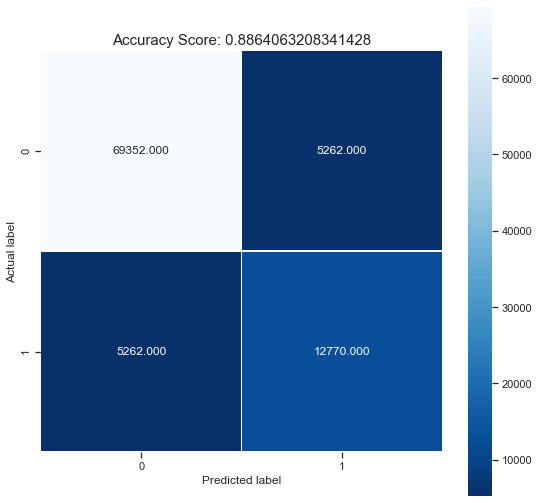

In [144]:
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [145]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.93      0.93      0.93     74614
     class 1       0.71      0.71      0.71     18032

    accuracy                           0.89     92646
   macro avg       0.82      0.82      0.82     92646
weighted avg       0.89      0.89      0.89     92646



The model's accuracy is good and the recall is highly imporved at 0.71 for pcp = 1. 

In [146]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_bal_probs_rf)

auc = metrics.roc_auc_score(y_test, predictions_bal_probs_rf)

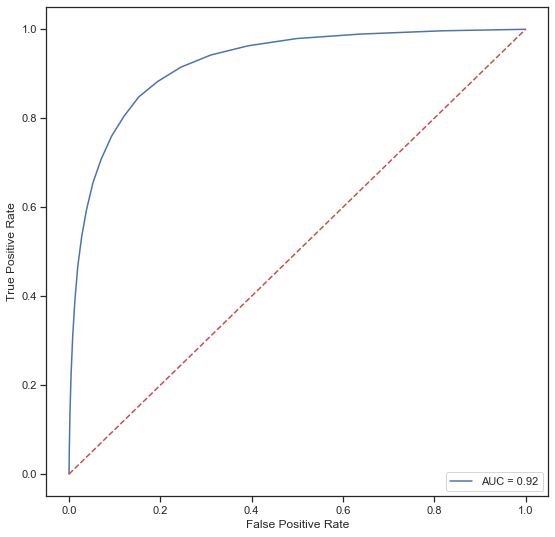

In [147]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

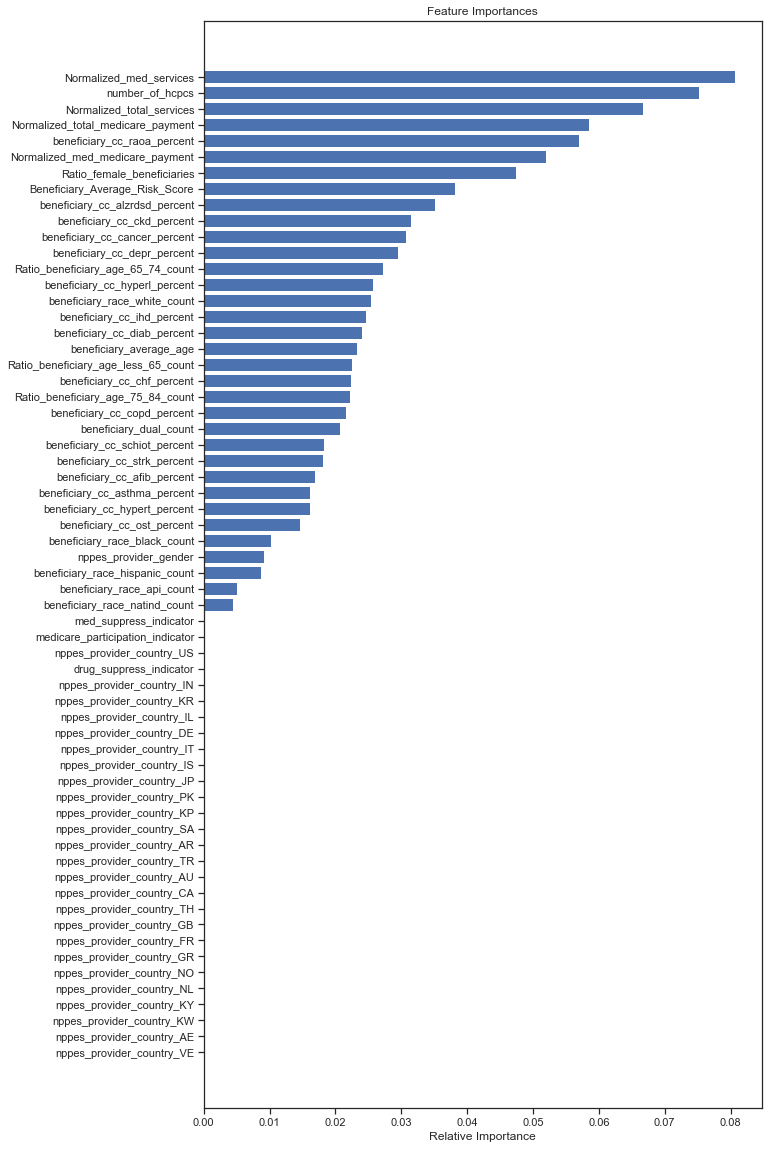

In [120]:
importances = rf.feature_importances_
indices = np.argsort(importances)


plt.rcParams['figure.figsize']=(10,20)
features = train.drop('pcp', axis = 1).columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The model shows important contributions from total med services, the number of hcpcs codes, payments, and the patients taht are predisposed to  rheumatoid arthritis/osteoarthritis. The categorical features turned out to be less important.
The random forest model is better than the logistic regression in its accuracy with better in recall for pcp class 1.

## Light GBM classifier
This tree based (that grows leaf wise) runs faster than XGBoost and works better in terms of spatial computational burden. It is able to handle imbalanced large-scale data sets (we don't have to downsample).
Documentation: https://lightgbm.readthedocs.io/en/latest/

In [166]:
# Light GBM, a gradient boosting tree-based model.
import lightgbm as lgb

In [167]:
y_train = np.array(train['pcp'])
y_train_downsampled = np.array(train_downsampled['pcp'])
y_test = np.array(test['pcp'])

# Remove the labels from the features - axis 1 is columns
X_train = train.drop('pcp', axis = 1)
X_train_downsampled= train_downsampled.drop('pcp', axis = 1)
X_test = test.drop('pcp', axis = 1)

# Saving feature names for later use
train_colnames = list(X_train.columns)
train_downsampled_colnames = list(train_downsampled.columns)
test_colnames = list(test.columns)

# Convert to numpy array
X_train = np.array(X_train)
X_train_downsampled = np.array(X_train_downsampled)
X_test = np.array(X_test)

In [189]:
#Testing parameters. scale_pos_weight helps with unbalanced dat set, it is a binary classification, 
#the max_depth is adjusted to not be very high to avoid model complexity

model = lgb.LGBMClassifier(boosting_type='gbdt', objective= 'binary', colsample_bytree=1.0, scale_pos_weight = 4 ,
              importance_type='split', learning_rate=0.05, max_depth=7,
              min_child_samples=2, min_child_weight=0.0001, min_data_in_leaf=20,
              min_split_gain=0.01, n_estimators=120, n_jobs=-1, num_leaves=50,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True)

In [169]:
#finding parameters and performing cross-validation using GridSearchCV
#I used a reasonable range around the default values. This could be tuned more for better model performance. 

from sklearn.model_selection import GridSearchCV
estimator = lgb.LGBMRegressor()
param_grid = {
    'learning_rate': [ 0.05,0.1, 0.2],
    'n_estimators': [60, 80,100,120,180],
    'num_leaves':[40,50],
    'max_depth':[15], 'subsample_for_bin':[500,1000], 'min_child_samples':[10],
}
gbm = GridSearchCV(estimator, param_grid, cv=3)
gbm.fit(X_train, y_train)

print(gbm.cv_results_)
print('Best parameters found by grid search are:', gbm.best_params_)

{'mean_fit_time': array([ 5.18178209,  5.04930894,  5.1008033 ,  5.31693196,  6.03644824,
        6.31045651,  6.53788463,  6.6804955 ,  7.36988211,  7.75785756,
        8.00751448,  8.3772614 ,  9.76014709, 11.7854836 , 13.77217746,
       14.4813753 , 17.31242092, 18.11306914, 19.12536248, 19.05084904,
        6.78144558,  6.03838444,  6.65108649,  6.87279185,  7.61001039,
        8.14266483,  8.33522836,  8.38237945,  9.49027443,  9.19102033,
        9.27555911, 10.27799813, 10.23902273, 10.26424138, 10.47894375,
       10.97027866, 13.94913165, 13.93748085, 13.68171763, 14.79131985,
        5.46767275,  5.69379433,  5.86094125,  5.79882399,  6.40878065,
        6.7831885 ,  6.49440543,  6.93798105,  7.78170164,  7.68568858,
        7.82873543,  8.26901237,  8.58602651,  8.6439573 ,  8.92769933,
        9.98341918, 11.60432593, 11.05275257, 11.17693639, 13.14227589]), 'std_fit_time': array([0.06978626, 0.05480452, 0.094553  , 0.04727288, 0.02239458,
       0.13967563, 0.08624651, 0.

In [174]:
#Testing parameters with new parameters

model = lgb.LGBMClassifier(boosting_type='gbdt', objective= 'binary', colsample_bytree=1.0, scale_pos_weight = 4 ,
              importance_type='split', learning_rate=0.2, max_depth=15,
              min_child_samples=10, min_child_weight=0.0001, min_data_in_leaf=20,
              min_split_gain=0.01, n_estimators=180, n_jobs=-1, num_leaves=50,subsample_for_bin= 1000,
              random_state = 42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True)

In [190]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [176]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

In [177]:
# y_test: original target | y_pred: predicted target
cm3 = confusion_matrix(y_test, y_pred)
cm3

array([[64296, 10318],
       [ 2189, 15843]], dtype=int64)

In [178]:
# Use score method to get accuracy of model
score = model.score(X_test, y_test)
print(score)

0.8650022666925717


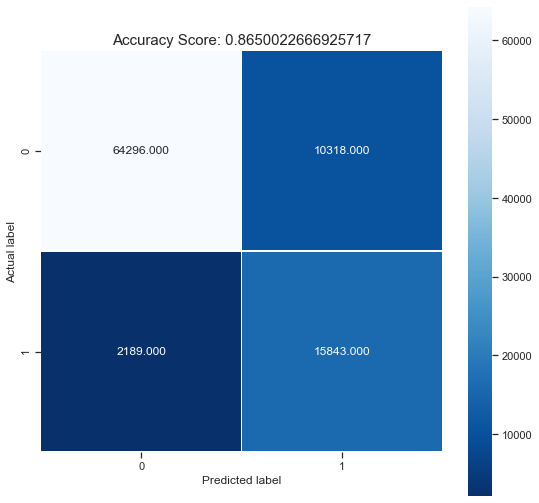

In [179]:
plt.figure(figsize=(9,9))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [180]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.86      0.91     74614
     class 1       0.61      0.88      0.72     18032

    accuracy                           0.87     92646
   macro avg       0.79      0.87      0.81     92646
weighted avg       0.90      0.87      0.87     92646



The Light GBM model has better recall at 0.88 for class 1 and accuracy is at 0.87.  

In [181]:
predictions_bal_probs_lgb = model.predict_proba(X_test)
predictions_bal_probs_lgb = predictions_bal_probs_lgb[:, 1] # keep the probabilities of the positive class only

In [182]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions_bal_probs_lgb)

auc = metrics.roc_auc_score(y_test, predictions_bal_probs_lgb)

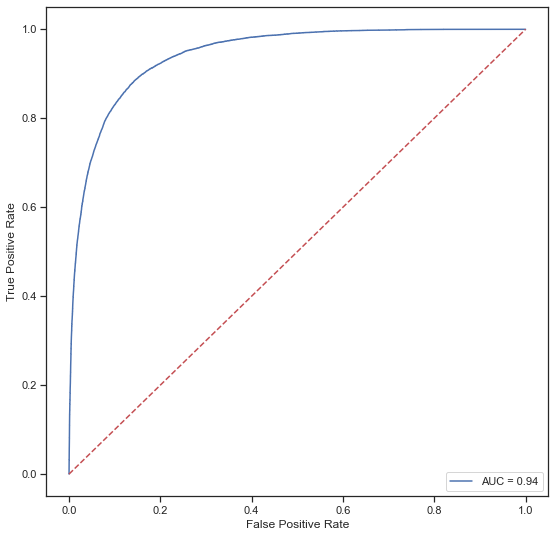

In [183]:
plt.figure(figsize=(9,9))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Overall, the ROC-AUC curve is the large for the LightGbm model with the auc score of 0.94. It is pretty similar to Random Forest, but performs a lot faster!

## Feature importance from the Light GBM model

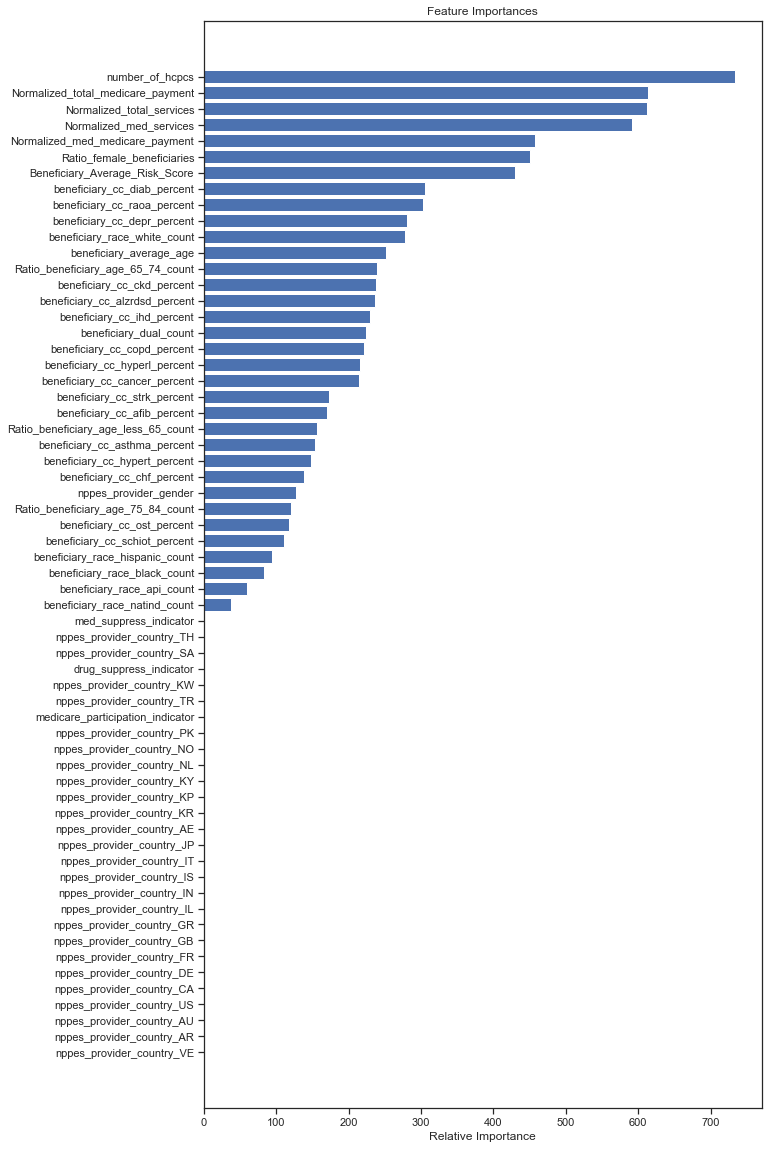

In [184]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.rcParams['figure.figsize']=(10,20)
features = train.drop('pcp', axis = 1).columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [191]:
#SHAP to understand the features better
import shap as shap
shap.initjs()
#explainer = shap.TreeExplainer(model)
shap_values = shap.TreeExplainer(model).shap_values(X_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


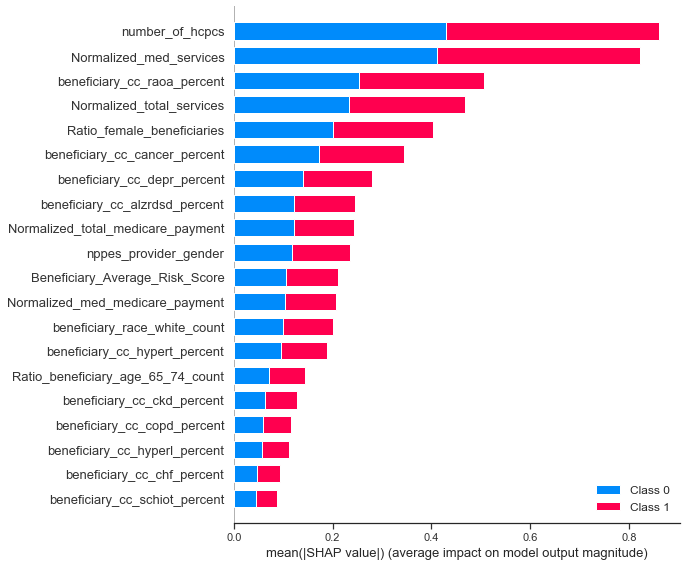

In [192]:
shap.summary_plot(shap_values, test.drop('pcp', axis = 1))

Shap values are good to interpret the directional importance of the features. While its results are slightly different than the previous analysis, it works well. 
Documentation: https://towardsdatascience.com/one-feature-attribution-method-to-supposedly-rule-them-all-shapley-values-f3e04534983d.
The number of hcpcs, normalized med services, gender of the beneficiaties, and their prediscposed health were all important features in predicting the class of providers. 

This graph is telling us the importance of each of the features at classifying something as present or past (class 0 or class 1). Notes that the library gives the importance of a feature by class. This is useful since some features may be relevant for one class, but not for another. Of course, in this model is a binary classification task, so it won’t surprise us to find that if a feature is important so classify something as Class 0, it will be so for Class 1. In a multiclass setting may be different.

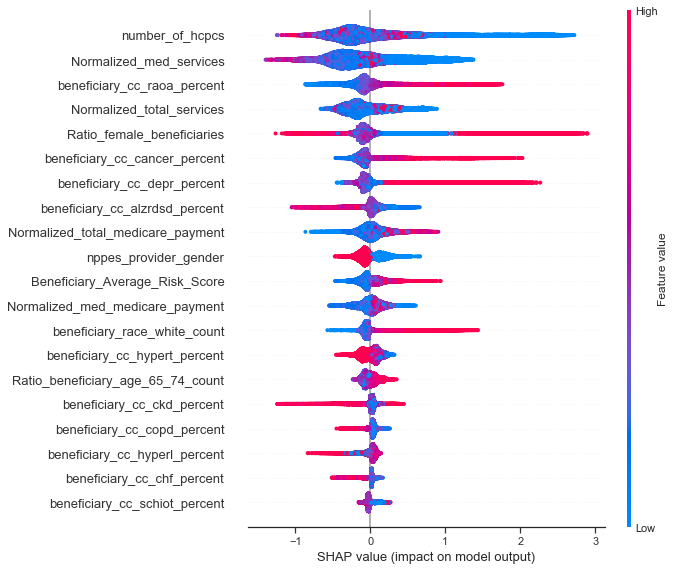

In [193]:
shap.summary_plot(shap_values[0], test.drop('pcp', axis = 1)) #Class 0

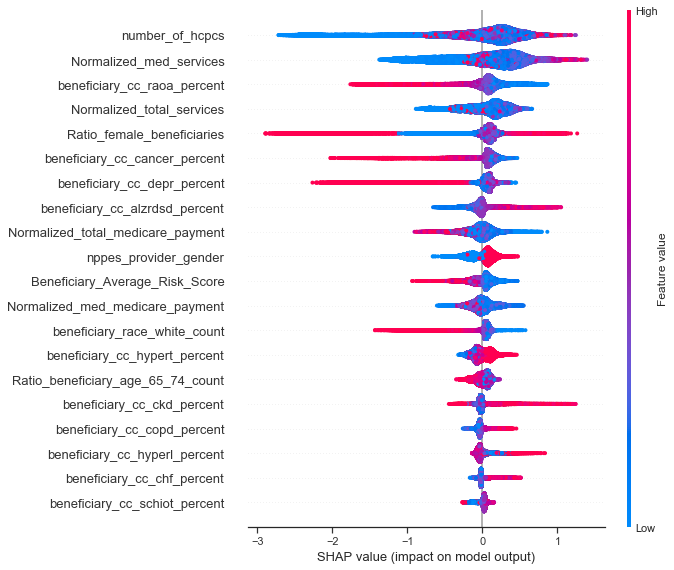

In [194]:
shap.summary_plot(shap_values[1], test.drop('pcp', axis = 1)) #Class 1

## Takeaways from the model 

Variables are ranked in descending order.The horizontal location shows whether the effect of that value is associated with a higher or lower prediction. The color shows whether that variable is high (in red) or low (in blue) for that observation.

Feature importance

•	Low number of hcpcs codes were positively correlated with Class 0 providers. This is interesting because it implies that Class 0 providers had a lower volume of medical service (they are specific). The opposite applies to Class 1.

•	Additionally, high values of specialized health risks like rheumatoid arthritis, cancer, depression in beneficiaries had a direct correlation with Class 0 providers instead of Class 1. This makes sense because Internal Medicine and Family Practice could be broad fields.

•	However, beneficiaries of Class 1 providers had an increased predisposition to Alzheimer's. Internal medicine or family practice could tend towards older patients who may stand higher odds of having dementia.

•	Consistent with prior EDA, medicare payments were higher for Class 0 health providers. And high risk score in beneficiaries were found to be positively correlated with Class 0.

•	Lastly, a surprising feature was the gender of the doctor in either classes; there were more males amongst Class 1 providers (provider_gender).
